# Capstone 2 Modeling

In [21]:
import pandas as pd
import numpy as np
import xgboost as xg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, f1_score, auc, accuracy_score, log_loss, classification_report,confusion_matrix,roc_curve,roc_auc_score
from datetime import datetime
#import warnings
#warnings.filterwarnings('ignore')



In [2]:
codon_list = ['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG',
       'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC',
       'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA',
       'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA',
       'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU',
       'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU',
       'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA']

amino_list = ['alanine', 'arginine',
       'asparagine', 'aspartic acid', 'cysteine', 'glutamine', 'glutamic acid',
       'glycine', 'histidine', 'isoleucine', 'leucine', 'lysine', 'methionine',
       'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan',
       'tyrosine', 'valine', 'start', 'stop']

In [3]:
dnacols = ['D_chloroplast', 'D_genomic', 'D_mitochondrial']
kingcols = ['K_bacteria', 'K_virus', 'K_plant', 'K_vertebrate', 'K_invertebrate',
            'K_mammal', 'K_bacteriophage', 'K_rodent', 'K_primate', 'K_archaea']


In [4]:
# importing the csv from the preprocessing notebook
cu = pd.read_csv('codon_usage3.csv')
cu.head()

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,K_invertebrate,K_mammal,K_plant,K_primate,K_rodent,K_vertebrate,K_virus,D_chloroplast,D_genomic,D_mitochondrial
0,0,virus,genomic,100217,-0.108063,Epizootic haematopoietic necrosis virus,-0.468279,-0.984617,-0.973734,-1.141636,...,0,0,0,0,0,0,1,0,1,0
1,1,virus,genomic,100220,-0.108785,Bohle iridovirus,0.139840,-0.851972,-0.964991,-0.788651,...,0,0,0,0,0,0,1,0,1,0
2,2,virus,genomic,100755,-0.104089,Sweet potato leaf curl virus,-0.284696,-0.143098,-0.338885,0.145086,...,0,0,0,0,0,0,1,0,1,0
3,3,virus,genomic,100880,-0.108174,Northern cereal mosaic virus,-0.398861,-0.087111,-0.211624,-0.449699,...,0,0,0,0,0,0,1,0,1,0
4,4,virus,genomic,100887,-0.079183,Soil-borne cereal mosaic virus,0.198357,-0.839913,-0.625466,2.450823,...,0,0,0,0,0,0,1,0,1,0


In this notebook I'm going to prepare and evaluate several different models.  Each model will be run across a range of hyperparameter values.  Also, each model will be applied to 4 sets of outcome and predictor variables.  I'll predict DNAtype based on amino acids, DNAtype based on codons, kingdom based on amino acids, and kingdom based on codons.  Incorporating both the amino acid and codon data in a single model would be unwarranted, as the amino acid frequencies are linear combinations of the codon frequencies.

In [91]:
# it could be useful to store the results for all of these models 
# what columns do I anticipate needing?
# some of these will be dict()s - which may be a challenge, but seems like the best solution
# I hate having model_id as a column but I see no good alternative

r_cols = ['model_id', 'model_type', 'inputs', 'outputs', 'hyperparameters', 'assessment', 'dt'] 
results = pd.DataFrame(columns = r_cols)




In [92]:
results

,model_id,model_type,inputs,outputs,hyperparameters,assessment,dt


### K-Nearest Neighbors

In [93]:
# predicting DNA on codon

y = cu[dnacols]
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1331)

train_a = []
test_a = []
train_f1 = []
test_f1 = []

for i in range(1, 11):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
     
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    test_a.append(accuracy_score(y_test, test_pred))
    train_a.append(accuracy_score(y_train, train_pred))
    
    test_f1.append(f1_score(y_test, test_pred, average='micro'))
    train_f1.append(f1_score(y_train, train_pred, average='micro'))

for i in range(1, 11):
    print("K =", i, "train:", train_a[i-1], "train f1:", train_f1[i-1], "test:", test_a[i-1], "test f1:", test_f1[i-1])
    item = ['10001001', 'kNN', 'DNA', 'codon', {'k':i}, {'train_f1':train_f1[i-1], 'test_f1':test_f1[i-1], 'train_accuracy':train_a[i-1], 'test_accuracy':test_a[i-1]}, datetime.now()]
    insert = dict(zip(r_cols, item))
    results = results.append(insert, ignore_index=True)

K = 1 train: 0.9998897950187349 train f1: 0.9998897950187349 test: 0.9940858832604783 test f1: 0.9940858832604783
K = 2 train: 0.9948203658805378 train f1: 0.9974034583724657 test: 0.9897145795834404 test f1: 0.9932903225806452
K = 3 train: 0.9973550804496363 train f1: 0.9976299399217329 test: 0.9933144767292363 test f1: 0.9935699588477367
K = 4 train: 0.994269340974212 train f1: 0.9962455830388692 test: 0.9910002571355104 test f1: 0.9927872230808861
K = 5 train: 0.9958122107119242 train f1: 0.9959219662735588 test: 0.9920287991771664 test f1: 0.992411575562701
K = 6 train: 0.9936081110866212 train f1: 0.9953632148377125 test: 0.9907431216250965 test f1: 0.9922740149369045
K = 7 train: 0.9950407758430682 train f1: 0.9953698599933857 test: 0.9912573926459244 test f1: 0.9915123456790124
K = 8 train: 0.9933877011240908 train f1: 0.994977647773056 test: 0.9892003085626125 test f1: 0.9912393712960578
K = 9 train: 0.9943795459554772 train f1: 0.9947632434816162 test: 0.9907431216250965 test 

In [94]:
results

,model_id,model_type,inputs,outputs,hyperparameters,assessment,dt
0,10001001,kNN,DNA,codon,{'k': 1},"{'train_f1': 0.9998897950187349, 'test_f1': 0....",2021-10-21 09:50:30.561176
1,10001001,kNN,DNA,codon,{'k': 2},"{'train_f1': 0.9974034583724657, 'test_f1': 0....",2021-10-21 09:50:30.569174
2,10001001,kNN,DNA,codon,{'k': 3},"{'train_f1': 0.9976299399217329, 'test_f1': 0....",2021-10-21 09:50:30.579179
3,10001001,kNN,DNA,codon,{'k': 4},"{'train_f1': 0.9962455830388692, 'test_f1': 0....",2021-10-21 09:50:30.587180
4,10001001,kNN,DNA,codon,{'k': 5},"{'train_f1': 0.9959219662735588, 'test_f1': 0....",2021-10-21 09:50:30.597181
5,10001001,kNN,DNA,codon,{'k': 6},"{'train_f1': 0.9953632148377125, 'test_f1': 0....",2021-10-21 09:50:30.606283
6,10001001,kNN,DNA,codon,{'k': 7},"{'train_f1': 0.9953698599933857, 'test_f1': 0....",2021-10-21 09:50:30.619442
7,10001001,kNN,DNA,codon,{'k': 8},"{'train_f1': 0.994977647773056, 'test_f1': 0.9...",2021-10-21 09:50:30.630442
8,10001001,kNN,DNA,codon,{'k': 9},"{'train_f1': 0.9947632434816162, 'test_f1': 0....",2021-10-21 09:50:30.641445
9,10001001,kNN,DNA,codon,{'k': 10},"{'train_f1': 0.9942598520808037, 'test_f1': 0....",2021-10-21 09:50:30.651450


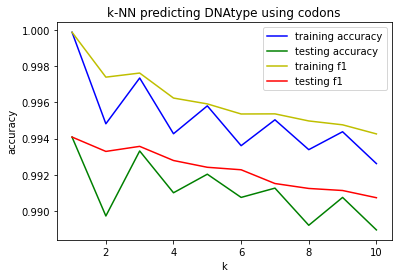

In [95]:
line1, = plt.plot(range(1,11), train_a, 'b')
line2, = plt.plot(range(1,11), test_a, 'g')
line3, = plt.plot(range(1,11), train_f1, 'y')
line4, = plt.plot(range(1,11), test_f1, 'r')
plt.legend([line1, line2, line3, line4], ['training accuracy', 'testing accuracy', 'training f1', 'testing f1'])
plt.title('k-NN predicting DNAtype using codons')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()

The overall accuracies given above seem suspiciously high.  I feel like I need to do some kind of model diagnostics.  Let's consider what we get using the aminos instead of the codons.  I also should find a good way to store the testing and training scores.

K = 1 train: 0.9998897950187349 train f1: 0.9998897950187349 test: 0.9922859346875803 test f1: 0.9922859346875803
K = 2 train: 0.9905223716111968 train f1: 0.9951835243315064 test: 0.9853432759064027 test f1: 0.9908209437621203
K = 3 train: 0.9949305708618029 train f1: 0.9950402292516256 test: 0.9935716122396503 test f1: 0.9938271604938271
K = 4 train: 0.9907427815737271 train f1: 0.9934250511077959 test: 0.9915145281563383 test f1: 0.993046613443214
K = 5 train: 0.9933877011240908 train f1: 0.9936614672325415 test: 0.9922859346875803 test f1: 0.9929242248809984
K = 6 train: 0.9911836014987877 train f1: 0.9931537102473499 test: 0.9915145281563383 test f1: 0.9933024214322513
K = 7 train: 0.9922856513114393 train f1: 0.9929422143802382 test: 0.9930573412188223 test f1: 0.993696127621253
K = 8 train: 0.9899713467048711 train f1: 0.9921581621382816 test: 0.9907431216250965 test f1: 0.9926574777792092
K = 9 train: 0.9907427815737271 train f1: 0.9912343569105242 test: 0.9920287991771664 test

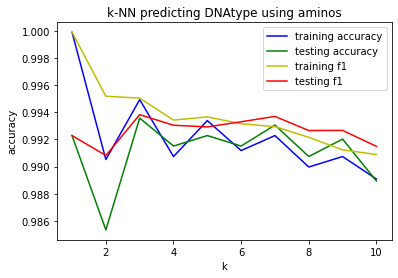

In [96]:
# keeping y as DNAtype, now predicting using aminos
# also integrating all of this stuff into a single cell

X = cu[amino_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13131)
train_a = []
test_a = []
train_f1 = []
test_f1 = []

for i in range(1,11):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
     
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    test_a.append(accuracy_score(y_test, test_pred))
    train_a.append(accuracy_score(y_train, train_pred))
    
    test_f1.append(f1_score(y_test, test_pred, average='micro'))
    train_f1.append(f1_score(y_train, train_pred, average='micro'))
    
for i in range(1, 11):
    print("K =", i, "train:", train_a[i-1], "train f1:", train_f1[i-1], "test:", test_a[i-1], "test f1:", test_f1[i-1])
    item = ['10002001', 'kNN', 'DNA', 'amino', {'k':i}, {'train_f1':train_f1[i-1], 'test_f1':test_f1[i-1], 'train_accuracy':train_a[i-1], 'test_accuracy':test_a[i-1]}, datetime.now()]
    insert = dict(zip(r_cols, item))
    results = results.append(insert, ignore_index=True)  
    
line1, = plt.plot(range(1,11), train_a, 'b')
line2, = plt.plot(range(1,11), test_a, 'g')
line3, = plt.plot(range(1,11), train_f1, 'y')
line4, = plt.plot(range(1,11), test_f1, 'r')
plt.legend([line1, line2, line3, line4], ['training accuracy', 'testing accuracy', 'training f1', 'testing f1'])
plt.title('k-NN predicting DNAtype using aminos')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()



Again, all of these scores seem very high indeed.  Also note that here, unlike in the preceding case, **some of the test scores are higher than the train scores.**  This is a sure sign that something has gone glaringly wrong. What's happening here?  What if we try to model the kingdom (rather than DNAtype, as in the preceding instances) using this method?


K = 1 train: 1.0 train f1: 1.0 test: 0.9308305476986372 test f1: 0.9308305476986372
K = 2 train: 0.9325545514657263 train f1: 0.9651003649635037 test: 0.8791463101054255 test f1: 0.9195804195804196
K = 3 train: 0.9563588274189994 train f1: 0.963312427152134 test: 0.9177166366675238 test f1: 0.9250907205806116
K = 4 train: 0.9203217985452943 train f1: 0.949732741953827 test: 0.8817176652095654 test f1: 0.9154985983179816
K = 5 train: 0.9371831606788626 train f1: 0.9477320851443218 test: 0.9061455386988944 test f1: 0.9187850345456916
K = 6 train: 0.9048931011681728 train f1: 0.9355665698171254 test: 0.8794034456158395 test f1: 0.9119999999999999
K = 7 train: 0.9197707736389685 train f1: 0.9341840161182002 test: 0.8945744407302648 test f1: 0.9128837575439517
K = 8 train: 0.8933215781353318 train f1: 0.924814603536794 test: 0.868603754178452 test f1: 0.9038127090301004
K = 9 train: 0.9066563808684153 train f1: 0.9250576263563277 test: 0.8814605296991515 test f1: 0.9044854881266491
K = 10 t

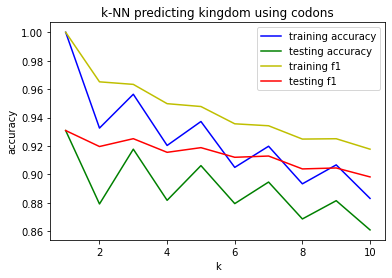

In [97]:
y = cu[kingcols]
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=212)
train_a = []
test_a = []
train_f1 = []
test_f1 = []

for i in range(1,11):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
     
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    test_a.append(accuracy_score(y_test, test_pred))
    train_a.append(accuracy_score(y_train, train_pred))
    
    test_f1.append(f1_score(y_test, test_pred, average='micro'))
    train_f1.append(f1_score(y_train, train_pred, average='micro'))

for i in range(1, 11):
    print("K =", i, "train:", train_a[i-1], "train f1:", train_f1[i-1], "test:", test_a[i-1], "test f1:", test_f1[i-1])
    item = ['10003001', 'kNN', 'king', 'codon', {'k':i}, {'train_f1':train_f1[i-1], 'test_f1':test_f1[i-1], 'train_accuracy':train_a[i-1], 'test_accuracy':test_a[i-1]}, datetime.now()]
    insert = dict(zip(r_cols, item))
    results = results.append(insert, ignore_index=True)  
    
line1, = plt.plot(range(1,11), train_a, 'b')
line2, = plt.plot(range(1,11), test_a, 'g')
line3, = plt.plot(range(1,11), train_f1, 'y')
line4, = plt.plot(range(1,11), test_f1, 'r')
plt.legend([line1, line2, line3, line4], ['training accuracy', 'testing accuracy', 'training f1', 'testing f1'])
plt.title('k-NN predicting kingdom using codons')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()


This is interesting - these results aren't suspiciously high.  Indeed, the k-NN models applied to kingdom as outcome have scores that look a little weak.  What if we use the codons (instead of aminos) to predict?


K = 1 train a: 1.0 train f1: 1.0 test a: 0.8711751092825919 test f1: 0.8711751092825919
K = 2 train a: 0.8601498787745206 train f1: 0.9248178209609574 test a: 0.7850347132939058 test f1: 0.8556614349775783
K = 3 train a: 0.9083094555873925 train f1: 0.9258073574838528 test a: 0.8521470815119568 test f1: 0.8703873933026922
K = 4 train a: 0.8422966718095658 train f1: 0.8988063738460633 test a: 0.7960915402417074 test f1: 0.8569056185995019
K = 5 train a: 0.8723826316949526 train f1: 0.9009788299567494 test a: 0.8351761378246336 test f1: 0.8642895156998405
K = 6 train a: 0.8240026449195503 train f1: 0.882450135725245 test a: 0.7950629982000514 test f1: 0.8547339322736697
K = 7 train a: 0.8502314304606569 train f1: 0.8845448291676221 test a: 0.826433530470558 test f1: 0.8610850636302747
K = 8 train a: 0.8108882521489972 train f1: 0.8701513718070009 test a: 0.7863203908459758 test f1: 0.8476784476784478
K = 9 train a: 0.8314965836455808 train f1: 0.8713980481607668 test a: 0.807919773720750

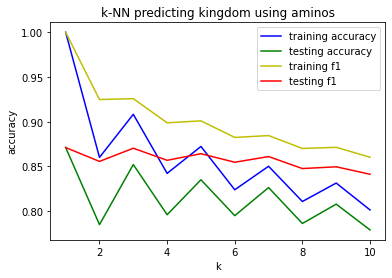

In [99]:
# finally, kingdom on aminos

X = cu[amino_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2102)

train_a = []
test_a = []
train_f1 = []
test_f1 = []

for i in range(1,11):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
     
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    test_a.append(accuracy_score(y_test, test_pred))
    train_a.append(accuracy_score(y_train, train_pred))
    
    test_f1.append(f1_score(y_test, test_pred, average='micro'))
    train_f1.append(f1_score(y_train, train_pred, average='micro'))

for i in range(1, 11):
    print("K =", i, "train a:", train_a[i-1], "train f1:", train_f1[i-1], "test a:", test_a[i-1], "test f1:", test_f1[i-1])
    item = ['10004001', 'kNN', 'king', 'amino', {'k':i}, {'train_f1':train_f1[i-1], 'test_f1':test_f1[i-1], 'train_accuracy':train_a[i-1], 'test_accuracy':test_a[i-1]}, datetime.now()]
    insert = dict(zip(r_cols, item))
    results = results.append(insert, ignore_index=True)      

line1, = plt.plot(range(1,11), train_a, 'b')
line2, = plt.plot(range(1,11), test_a, 'g')
line3, = plt.plot(range(1,11), train_f1, 'y')
line4, = plt.plot(range(1,11), test_f1, 'r')
plt.legend([line1, line2, line3, line4], ['training accuracy', 'testing accuracy', 'training f1', 'testing f1'])
plt.title('k-NN predicting kingdom using aminos')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()

knn_king_amino_train, knn_king_amino_test = train_scores, test_scores

Interestingly, I'm not seeing the same problems when fitting kNN to model 'kingdom' that I did modeling 'DNAtype' - what explains this?  If there were some problem with the train test split, or normalization, wouldn't it impact both sets of models?  This is something that I really need to explain.

## Random Forest

I'm going to start with a single random forest model, and assess feature importance.

In [12]:
y = cu[dnacols]
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13013)

rfc = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = rfc.fit(X_train, y_train)
y_pred = model_res.predict(X_test)

ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.986
Random Forest: f1-score=0.989


30


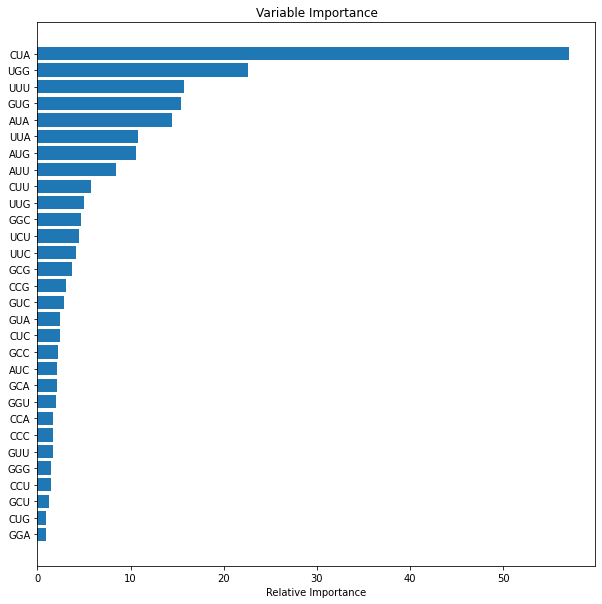

In [13]:
feature_importance = rfc.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Random Forest: Accuracy=0.985
Random Forest: f1-score=0.987
22


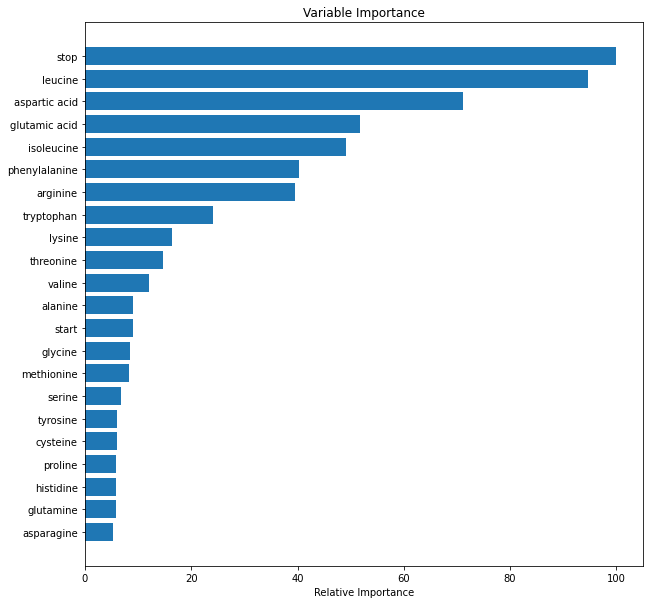

In [14]:
y = cu[dnacols]
X = cu[amino_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1863)

rfc = RandomForestClassifier(n_estimators=300, random_state = 531,n_jobs=-1)
model_res = rfc.fit(X_train, y_train)
y_pred = model_res.predict(X_test)

ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

feature_importance = rfc.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [116]:
# removing some results before correcting the code below
# results = results.loc[results["model_id"] != '20001001']

n_est: 200 train a: 1.0 train f1: 1.0 test a: 0.9886860375417845 test f1: 0.9917461955119938
n_est: 220 train a: 1.0 train f1: 1.0 test a: 0.9889431730521985 test f1: 0.9917483238782877
n_est: 240 train a: 1.0 train f1: 1.0 test a: 0.9889431730521985 test f1: 0.9917483238782877
n_est: 260 train a: 1.0 train f1: 1.0 test a: 0.9892003085626125 test f1: 0.9918783034678355
n_est: 280 train a: 1.0 train f1: 1.0 test a: 0.9892003085626125 test f1: 0.991750451147203
n_est: 300 train a: 1.0 train f1: 1.0 test a: 0.9892003085626125 test f1: 0.991750451147203
n_est: 320 train a: 1.0 train f1: 1.0 test a: 0.9892003085626125 test f1: 0.9918783034678355
n_est: 340 train a: 1.0 train f1: 1.0 test a: 0.9889431730521985 test f1: 0.9917483238782877
n_est: 360 train a: 1.0 train f1: 1.0 test a: 0.9889431730521985 test f1: 0.9917483238782877
n_est: 380 train a: 1.0 train f1: 1.0 test a: 0.9892003085626125 test f1: 0.9916226317824463
n_est: 400 train a: 1.0 train f1: 1.0 test a: 0.9892003085626125 test f1

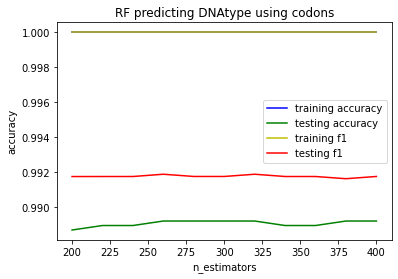

In [118]:
# ok, let's try iterating over some values for n_estimators
# (here, y=DNAtype and X=codons)
y = cu[dnacols]
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=76377)

train_a = []
test_a = []
train_f1 = []
test_f1 = []


for i in range(11):
    
    rfc = RandomForestClassifier(n_estimators=200+20*i, random_state = 1,n_jobs=-1)
    rfc.fit(X_train,y_train)
    
    train_pred = rfc.predict(X_train)
    test_pred = rfc.predict(X_test)
    test_a.append(accuracy_score(y_test, test_pred))
    train_a.append(accuracy_score(y_train, train_pred))
    
    test_f1.append(f1_score(y_test, test_pred, average='micro'))
    train_f1.append(f1_score(y_train, train_pred, average='micro'))


for i in range(11):
    print("n_est:", 200+20*i, "train a:", train_a[i], "train f1:", train_f1[i], "test a:", test_a[i], "test f1:", test_f1[i])
    item = ['20001001', 'RF', 'DNA', 'codon', {'n_estimators':200+20*i}, {'train_f1':train_f1[i], 'test_f1':test_f1[i], 'train_accuracy':train_a[i], 'test_accuracy':test_a[i]}, datetime.now()]
    insert = dict(zip(r_cols, item))
    results = results.append(insert, ignore_index=True)      

    
xl = list(range(200, 401, 20))
line1, = plt.plot(xl, train_a, 'b')
line2, = plt.plot(xl, test_a, 'g')
line3, = plt.plot(xl, train_f1, 'y')
line4, = plt.plot(xl, test_f1, 'r')
plt.legend([line1, line2, line3, line4], ['training accuracy', 'testing accuracy', 'training f1', 'testing f1'])
plt.title('RF predicting DNAtype using codons')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.show()


Interestingly, we have nearly perfect training accuracy across all values of n_estimators.  Testing accuracy is also very high, but slightly variable.

n_est: 200 train a: 1.0 train f1: 1.0 test a: 0.9848290048855747 test f1: 0.9864777849323889
n_est: 220 train a: 1.0 train f1: 1.0 test a: 0.9845718693751607 test f1: 0.9864743011722272
n_est: 240 train a: 1.0 train f1: 1.0 test a: 0.9843147338647468 test f1: 0.9862166688136031
n_est: 260 train a: 1.0 train f1: 1.0 test a: 0.9843147338647468 test f1: 0.9864708156165443
n_est: 280 train a: 1.0 train f1: 1.0 test a: 0.9843147338647468 test f1: 0.9864708156165443
n_est: 300 train a: 1.0 train f1: 1.0 test a: 0.9845718693751607 test f1: 0.9866013913939706
n_est: 320 train a: 1.0 train f1: 1.0 test a: 0.9845718693751607 test f1: 0.9866013913939706
n_est: 340 train a: 1.0 train f1: 1.0 test a: 0.9845718693751607 test f1: 0.9866013913939706
n_est: 360 train a: 1.0 train f1: 1.0 test a: 0.9845718693751607 test f1: 0.9866013913939706
n_est: 380 train a: 1.0 train f1: 1.0 test a: 0.9843147338647468 test f1: 0.9864708156165443
n_est: 400 train a: 1.0 train f1: 1.0 test a: 0.9840575983543327 test 

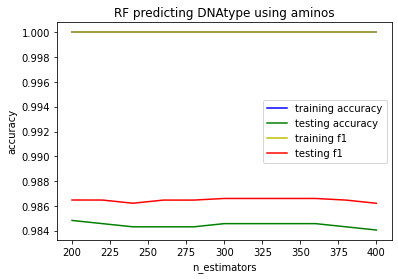

In [119]:
# still predicting DNAtype, now using aminos

X = cu[amino_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=608)

train_a = []
test_a = []
train_f1 = []
test_f1 = []


for i in range(11):
    
    rfc = RandomForestClassifier(n_estimators=200+20*i, random_state = 31,n_jobs=-1)
    rfc.fit(X_train,y_train)
    
    train_pred = rfc.predict(X_train)
    test_pred = rfc.predict(X_test)
    
    test_a.append(accuracy_score(y_test, test_pred))
    train_a.append(accuracy_score(y_train, train_pred))
    
    test_f1.append(f1_score(y_test, test_pred, average='micro'))
    train_f1.append(f1_score(y_train, train_pred, average='micro'))


for i in range(11):
    print("n_est:", 200+20*i, "train a:", train_a[i], "train f1:", train_f1[i], "test a:", test_a[i], "test f1:", test_f1[i])
    item = ['20002001', 'RF', 'DNA', 'amino', {'n_estimators':200+20*i}, {'train_f1':train_f1[i], 'test_f1':test_f1[i], 'train_accuracy':train_a[i], 'test_accuracy':test_a[i]}, datetime.now()]
    insert = dict(zip(r_cols, item))
    results = results.append(insert, ignore_index=True)      

  
xl = list(range(200, 401, 20))
line1, = plt.plot(xl, train_a, 'b')
line2, = plt.plot(xl, test_a, 'g')
line3, = plt.plot(xl, train_f1, 'y')
line4, = plt.plot(xl, test_f1, 'r')
plt.legend([line1, line2, line3, line4], ['training accuracy', 'testing accuracy', 'training f1', 'testing f1'])
plt.title('RF predicting DNAtype using aminos')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.show()



The same phenomenon.  I'm suspecting this will be the same in the remaining two cases.


In [123]:
results = results.loc[results["model_id"] != '20003001']
results

,model_id,model_type,inputs,outputs,hyperparameters,assessment,dt
0,10001001,kNN,DNA,codon,{'k': 1},"{'train_f1': 0.9998897950187349, 'test_f1': 0....",2021-10-21 09:50:30.561176
1,10001001,kNN,DNA,codon,{'k': 2},"{'train_f1': 0.9974034583724657, 'test_f1': 0....",2021-10-21 09:50:30.569174
2,10001001,kNN,DNA,codon,{'k': 3},"{'train_f1': 0.9976299399217329, 'test_f1': 0....",2021-10-21 09:50:30.579179
3,10001001,kNN,DNA,codon,{'k': 4},"{'train_f1': 0.9962455830388692, 'test_f1': 0....",2021-10-21 09:50:30.587180
4,10001001,kNN,DNA,codon,{'k': 5},"{'train_f1': 0.9959219662735588, 'test_f1': 0....",2021-10-21 09:50:30.597181
...,...,...,...,...,...,...,...
57,20002001,RF,DNA,amino,{'n_estimators': 320},"{'train_f1': 1.0, 'test_f1': 0.986601391393970...",2021-10-21 10:55:18.555249
58,20002001,RF,DNA,amino,{'n_estimators': 340},"{'train_f1': 1.0, 'test_f1': 0.986601391393970...",2021-10-21 10:55:18.555249
59,20002001,RF,DNA,amino,{'n_estimators': 360},"{'train_f1': 1.0, 'test_f1': 0.986601391393970...",2021-10-21 10:55:18.570874
60,20002001,RF,DNA,amino,{'n_estimators': 380},"{'train_f1': 1.0, 'test_f1': 0.986470815616544...",2021-10-21 10:55:18.570874


n_est: 200 train a: 1.0 train f1: 1.0 test a: 0.7410645410131139 test f1: 0.8425668761876918
n_est: 220 train a: 1.0 train f1: 1.0 test a: 0.7413216765235279 test f1: 0.8428592311065634
n_est: 240 train a: 1.0 train f1: 1.0 test a: 0.740293134481872 test f1: 0.841935955549057
n_est: 260 train a: 1.0 train f1: 1.0 test a: 0.7405502699922859 test f1: 0.8422283959643223
n_est: 280 train a: 1.0 train f1: 1.0 test a: 0.7410645410131139 test f1: 0.8430598215591634
n_est: 300 train a: 1.0 train f1: 1.0 test a: 0.7405502699922859 test f1: 0.8425980105324752
n_est: 320 train a: 1.0 train f1: 1.0 test a: 0.7418359475443559 test f1: 0.8435672514619883
n_est: 340 train a: 1.0 train f1: 1.0 test a: 0.7428644895860118 test f1: 0.844489915229465
n_est: 360 train a: 1.0 train f1: 1.0 test a: 0.7423502185651839 test f1: 0.8439052908506285
n_est: 380 train a: 1.0 train f1: 1.0 test a: 0.7418359475443559 test f1: 0.8436905980406493
n_est: 400 train a: 1.0 train f1: 1.0 test a: 0.7431216250964258 test f1:

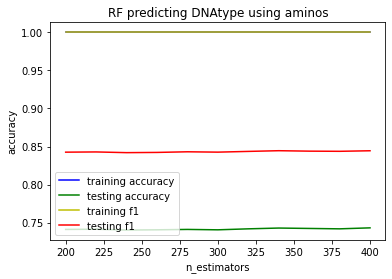

In [124]:
# predicting kingdom using codons

y = cu[kingcols]
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13013)


train_a = []
test_a = []
train_f1 = []
test_f1 = []

for i in range(11):
    
    rfc = RandomForestClassifier(n_estimators=200+20*i, random_state = 31,n_jobs=-1)
    rfc.fit(X_train,y_train)
    
    train_pred = rfc.predict(X_train)
    test_pred = rfc.predict(X_test)
    
    test_a.append(accuracy_score(y_test, test_pred))
    train_a.append(accuracy_score(y_train, train_pred))
    
    test_f1.append(f1_score(y_test, test_pred, average='micro'))
    train_f1.append(f1_score(y_train, train_pred, average='micro'))


for i in range(11):
    print("n_est:", 200+20*i, "train a:", train_a[i], "train f1:", train_f1[i], "test a:", test_a[i], "test f1:", test_f1[i])
    item = ['20003001', 'RF', 'DNA', 'codon', {'n_estimators':200+20*i}, {'train_f1':train_f1[i], 'test_f1':test_f1[i], 'train_accuracy':train_a[i], 'test_accuracy':test_a[i]}, datetime.now()]
    insert = dict(zip(r_cols, item))
    results = results.append(insert, ignore_index=True)      

    
xl = list(range(200, 401, 20))
line1, = plt.plot(xl, train_a, 'b')
line2, = plt.plot(xl, test_a, 'g')
line3, = plt.plot(xl, train_f1, 'y')
line4, = plt.plot(xl, test_f1, 'r')
plt.legend([line1, line2, line3, line4], ['training accuracy', 'testing accuracy', 'training f1', 'testing f1'])
plt.title('RF predicting DNAtype using aminos')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.show()



n_est: 200 train a: 1.0 train f1: 1.0 test a: 0.7076369246592954 test f1: 0.8126384172449431
n_est: 220 train a: 1.0 train f1: 1.0 test a: 0.7073797891488814 test f1: 0.8125830748781568
n_est: 240 train a: 1.0 train f1: 1.0 test a: 0.7073797891488814 test f1: 0.8121033210332104
n_est: 260 train a: 1.0 train f1: 1.0 test a: 0.7071226536384675 test f1: 0.8124076809453472
n_est: 280 train a: 1.0 train f1: 1.0 test a: 0.7081511956801234 test f1: 0.813228997490034
n_est: 300 train a: 1.0 train f1: 1.0 test a: 0.7066083826176395 test f1: 0.8125369603784743
n_est: 320 train a: 1.0 train f1: 1.0 test a: 0.7073797891488814 test f1: 0.8131835648832397
n_est: 340 train a: 1.0 train f1: 1.0 test a: 0.7076369246592954 test f1: 0.8134791605084245
n_est: 360 train a: 1.0 train f1: 1.0 test a: 0.7078940601697095 test f1: 0.8140153755174452
n_est: 380 train a: 1.0 train f1: 1.0 test a: 0.7089226022113654 test f1: 0.8142350856467808
n_est: 400 train a: 1.0 train f1: 1.0 test a: 0.7076369246592954 test f

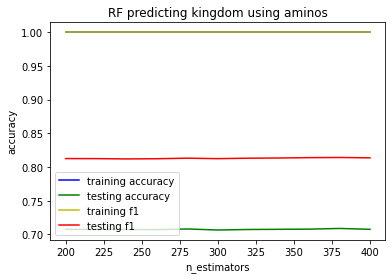

In [125]:
# predicting kingdom using aminos

X = cu[amino_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13013)

train_a = []
test_a = []
train_f1 = []
test_f1 = []


for i in range(11):
    
    rfc = RandomForestClassifier(n_estimators=200+20*i, random_state = 31,n_jobs=-1)
    rfc.fit(X_train,y_train)
    
    train_pred = rfc.predict(X_train)
    test_pred = rfc.predict(X_test)
    
    test_a.append(accuracy_score(y_test, test_pred))
    train_a.append(accuracy_score(y_train, train_pred))
    
    test_f1.append(f1_score(y_test, test_pred, average='micro'))
    train_f1.append(f1_score(y_train, train_pred, average='micro'))


for i in range(11):
    print("n_est:", 200+20*i, "train a:", train_a[i], "train f1:", train_f1[i], "test a:", test_a[i], "test f1:", test_f1[i])
    item = ['20004001', 'RF', 'DNA', 'codon', {'n_estimators':200+20*i}, {'train_f1':train_f1[i], 'test_f1':test_f1[i], 'train_accuracy':train_a[i], 'test_accuracy':test_a[i]}, datetime.now()]
    insert = dict(zip(r_cols, item))
    results = results.append(insert, ignore_index=True)      

    
xl = list(range(200, 401, 20))
line1, = plt.plot(xl, train_a, 'b')
line2, = plt.plot(xl, test_a, 'g')
line3, = plt.plot(xl, train_f1, 'y')
line4, = plt.plot(xl, test_f1, 'r')
plt.legend([line1, line2, line3, line4], ['training accuracy', 'testing accuracy', 'training f1', 'testing f1'])
plt.title('RF predicting kingdom using aminos')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.show()



The only difference seems to be that, when predicting kingdom as opposed to DNAtype, the testing accuracy drops substantially.  In all cases, the uniformly high training accuracy is suspicious.  I suspect that I'll need to adjust some other parameters for the Random Forest classifier in order to  produce a model that's actually useful. Let's examine the results so far:

In [134]:
results

,model_id,model_type,inputs,outputs,hyperparameters,assessment,dt
0,10001001,kNN,DNA,codon,{'k': 1},"{'train_f1': 0.9998897950187349, 'test_f1': 0....",2021-10-21 09:50:30.561176
1,10001001,kNN,DNA,codon,{'k': 2},"{'train_f1': 0.9974034583724657, 'test_f1': 0....",2021-10-21 09:50:30.569174
2,10001001,kNN,DNA,codon,{'k': 3},"{'train_f1': 0.9976299399217329, 'test_f1': 0....",2021-10-21 09:50:30.579179
3,10001001,kNN,DNA,codon,{'k': 4},"{'train_f1': 0.9962455830388692, 'test_f1': 0....",2021-10-21 09:50:30.587180
4,10001001,kNN,DNA,codon,{'k': 5},"{'train_f1': 0.9959219662735588, 'test_f1': 0....",2021-10-21 09:50:30.597181
...,...,...,...,...,...,...,...
79,20004001,RF,DNA,codon,{'n_estimators': 320},"{'train_f1': 1.0, 'test_f1': 0.813183564883239...",2021-10-21 11:36:00.987124
80,20004001,RF,DNA,codon,{'n_estimators': 340},"{'train_f1': 1.0, 'test_f1': 0.813479160508424...",2021-10-21 11:36:00.999128
81,20004001,RF,DNA,codon,{'n_estimators': 360},"{'train_f1': 1.0, 'test_f1': 0.814015375517445...",2021-10-21 11:36:01.012134
82,20004001,RF,DNA,codon,{'n_estimators': 380},"{'train_f1': 1.0, 'test_f1': 0.814235085646780...",2021-10-21 11:36:01.052141


84 rows is just what I expect so far.  Let's continue.

## XGBoost


In [19]:
# having never used the XGBoost classifier before, I will start with a naive instance
y = cu[dnacols]
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13013)

xgb = xg.XGBClassifier()
xgb.fit(X_train, y_train)
print(xgb)


C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: y should be a 1d array, got an array of shape (9074, 3) instead.

Based on the warning and the ValueError, I'm going to surmise that the encoding of response variables is unneeded and indeed unworkable for the XGBoost classifier, and I'm going to need to incorporate the original 'DNAtype' and 'kingdom' variables that I started with.  **I had to go back and edit the preprocessing notebook so as not to delete these variables in the first place.**

In [126]:
# trying again:  DNAtype on codon_list

y = cu['DNAtype']
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13013)

xgb = xg.XGBClassifier()
xgb.fit(X_train, y_train)
print(xgb)


C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:45:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [129]:
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", acc, "F1:", f1)

Accuracy: 0.9904859861146824 F1: 0.9904859861146824


Did this work?  Accuracy can be equal to F1, but never greater, right?  Obviously, though, hyperparameter tuning remains a pretty big deal here.

In [130]:
# XGBoost:  DNAcols predicted by aminos

y = cu['DNAtype']
X = cu[amino_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19044)

xgb = xg.XGBClassifier()
xgb.fit(X_train, y_train)
print(xgb)

y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", acc, "F1:", f1)

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 0.9930573412188223 F1: 0.9930573412188223


In [131]:
# XGBoost:  kingdom predicted by codons

y = cu['Kingdom']
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19044)

xgb = xg.XGBClassifier()
xgb.fit(X_train, y_train)
print(xgb)

y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", acc, "F1:", f1)

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 0.9244021599382874 F1: 0.9244021599382874


In [65]:
# XGBoost:  kingdom predicted by aminos

y = cu['DNAtype']
X = cu[amino_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19044)

xgb = xg.XGBClassifier()
xgb.fit(X_train, y_train)
print(xgb)

y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 99.31%


I don't know what to get out of this.  At least I got XGBoost to work; there are so many hyperparameters, though, that I'm not sure how to go about tuning them.  Nor am I sure how to evaluate these models, other than by such metrics as accuracy, F1, etc.

In [132]:

import hyperopt
from hyperopt import hp
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [133]:
# attempting to use hyperopt to select XGBoost hyperparameters
# starting out by cribbing from https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning

import hyperopt
from hyperopt import hp
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

y = cu['DNAtype']
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6016)

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    model=xg.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = hyperopt.fmin(fn = objective,
                        space = space,
                        algo = hyperopt.tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)



  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                 
0.913088197480072                                      
  1%|          | 1/100 [00:00<01:00,  1.63trial/s, best loss: -0.913088197480072]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                           
0.9694008742607354                                                               
  2%|▏         | 2/100 [00:02<01:44,  1.07s/trial, best loss: -0.9694008742607354]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9146310105425559                                                                
  3%|▎         | 3/100 [00:02<01:32,  1.05trial/s, best loss: -0.9694008742607354]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9138596040113139                                                                
  4%|▍         | 4/100 [00:03<01:24,  1.13trial/s, best loss: -0.9694008742607354]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9262021085111853                                                                
  5%|▌         | 5/100 [00:04<01:17,  1.23trial/s, best loss: -0.9694008742607354]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9704294163023913                                                                
  6%|▌         | 6/100 [00:05<01:35,  1.02s/trial, best loss: -0.9704294163023913]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.957058369760864                                                                 
  7%|▋         | 7/100 [00:06<01:39,  1.07s/trial, best loss: -0.9704294163023913]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9429159166880946                                                                
  8%|▊         | 8/100 [00:07<01:26,  1.06trial/s, best loss: -0.9704294163023913]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9766006685523271                                                                
  9%|▉         | 9/100 [00:09<01:43,  1.14s/trial, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9735150424273592                                                                
 10%|█         | 10/100 [00:10<01:56,  1.30s/trial, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9411159681151967                                                                 
 11%|█         | 11/100 [00:11<01:38,  1.11s/trial, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9377732064798149                                                                 
 12%|█▏        | 12/100 [00:12<01:25,  1.03trial/s, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9717150938544613                                                                 
 13%|█▎        | 13/100 [00:13<01:38,  1.13s/trial, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9161738236050398                                                                 
 14%|█▍        | 14/100 [00:14<01:24,  1.02trial/s, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9269735150424273                                                                 
 15%|█▌        | 15/100 [00:14<01:13,  1.16trial/s, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9704294163023913                                                                 
 16%|█▌        | 16/100 [00:16<01:21,  1.03trial/s, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9215736693237336                                                                 
 17%|█▋        | 17/100 [00:16<01:10,  1.17trial/s, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9161738236050398                                                                 
 18%|█▊        | 18/100 [00:17<01:04,  1.26trial/s, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9750578554898431                                                                 
 19%|█▉        | 19/100 [00:19<01:32,  1.15s/trial, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9642581640524557                                                                 
 20%|██        | 20/100 [00:20<01:41,  1.27s/trial, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9681151967086654                                                                 
 21%|██        | 21/100 [00:22<01:46,  1.35s/trial, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9730007714065313                                                                 
 22%|██▏       | 22/100 [00:23<01:43,  1.33s/trial, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9681151967086654                                                                 
 23%|██▎       | 23/100 [00:25<01:46,  1.39s/trial, best loss: -0.9766006685523271]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.977372075083569                                                                  
 24%|██▍       | 24/100 [00:26<01:52,  1.48s/trial, best loss: -0.977372075083569] 

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.977372075083569                                                                 
 25%|██▌       | 25/100 [00:28<01:53,  1.51s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9660581126253536                                                                
 26%|██▌       | 26/100 [00:29<01:46,  1.44s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9681151967086654                                                                
 27%|██▋       | 27/100 [00:31<01:48,  1.49s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9719722293648753                                                                
 28%|██▊       | 28/100 [00:32<01:48,  1.51s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9696580097711494                                                                
 29%|██▉       | 29/100 [00:34<01:53,  1.60s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9766006685523271                                                                
 30%|███       | 30/100 [00:36<01:54,  1.63s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9683723322190795                                                                
 31%|███       | 31/100 [00:37<01:43,  1.51s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.912059655438416                                                                 
 32%|███▏      | 32/100 [00:38<01:24,  1.25s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9634867575212137                                                                
 33%|███▎      | 33/100 [00:39<01:22,  1.23s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9205451272820776                                                                
 34%|███▍      | 34/100 [00:40<01:09,  1.05s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9125739264592441                                                                
 35%|███▌      | 35/100 [00:40<01:00,  1.07trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.977372075083569                                                                 
 36%|███▌      | 36/100 [00:42<01:12,  1.13s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9447158652609925                                                                
 37%|███▋      | 37/100 [00:43<01:03,  1.01s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9691437387503214                                                                
 38%|███▊      | 38/100 [00:44<01:06,  1.07s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9627153509899717                                                                
 39%|███▉      | 39/100 [00:45<01:09,  1.13s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9701722807919774                                                                
 40%|████      | 40/100 [00:46<01:10,  1.17s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9411159681151967                                                                
 41%|████      | 41/100 [00:47<01:00,  1.02s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9159166880946259                                                                
 42%|████▏     | 42/100 [00:48<00:53,  1.09trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9694008742607354                                                                
 43%|████▎     | 43/100 [00:49<00:57,  1.01s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.912831061969658                                                                 
 44%|████▍     | 44/100 [00:50<00:53,  1.04trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9668295191565955                                                                
 45%|████▌     | 45/100 [00:51<01:00,  1.09s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9763435330419131                                                                
 46%|████▌     | 46/100 [00:53<01:07,  1.25s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.956286963229622                                                                 
 47%|████▋     | 47/100 [00:54<01:08,  1.29s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9598868603754178                                                                
 48%|████▊     | 48/100 [00:55<01:05,  1.27s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9704294163023913                                                                
 49%|████▉     | 49/100 [00:57<01:04,  1.26s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9442015942401646                                                                
 50%|█████     | 50/100 [00:57<00:54,  1.09s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9760863975314991                                                                
 51%|█████     | 51/100 [00:59<01:00,  1.24s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9668295191565955                                                                
 52%|█████▏    | 52/100 [01:00<00:59,  1.23s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9683723322190795                                                                
 53%|█████▎    | 53/100 [01:01<00:57,  1.23s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9650295705836976                                                                
 54%|█████▍    | 54/100 [01:02<00:53,  1.17s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9411159681151967                                                                
 55%|█████▌    | 55/100 [01:03<00:45,  1.02s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9331447672923631                                                                
 56%|█████▌    | 56/100 [01:04<00:40,  1.09trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9166880946258679                                                                
 57%|█████▋    | 57/100 [01:04<00:35,  1.21trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9742864489586012                                                                
 58%|█████▊    | 58/100 [01:06<00:47,  1.14s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9678580611982515                                                                
 59%|█████▉    | 59/100 [01:08<00:53,  1.31s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.977629210593983                                                                 
 60%|██████    | 60/100 [01:09<00:56,  1.40s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9686294677294934                                                                
 61%|██████    | 61/100 [01:11<00:55,  1.43s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9763435330419131                                                                
 62%|██████▏   | 62/100 [01:13<00:56,  1.48s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9547441501671381                                                                
 63%|██████▎   | 63/100 [01:14<00:51,  1.40s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9732579069169452                                                                
 64%|██████▍   | 64/100 [01:15<00:51,  1.44s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.957829776292106                                                                 
 65%|██████▌   | 65/100 [01:17<00:50,  1.45s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9722293648752893                                                                
 66%|██████▌   | 66/100 [01:18<00:51,  1.50s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9771149395731551                                                                
 67%|██████▋   | 67/100 [01:20<00:51,  1.55s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9753149910002571                                                                
 68%|██████▊   | 68/100 [01:22<00:52,  1.65s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9660581126253536                                                                
 69%|██████▉   | 69/100 [01:23<00:48,  1.56s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.977372075083569                                                                 
 70%|███████   | 70/100 [01:25<00:47,  1.57s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9763435330419131                                                                
 71%|███████   | 71/100 [01:26<00:45,  1.57s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9719722293648753                                                                
 72%|███████▏  | 72/100 [01:28<00:44,  1.58s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9763435330419131                                                                
 73%|███████▎  | 73/100 [01:30<00:46,  1.71s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9766006685523271                                                                
 74%|███████▍  | 74/100 [01:32<00:43,  1.67s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.977629210593983                                                                 
 75%|███████▌  | 75/100 [01:33<00:41,  1.66s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.976857804062741                                                                 
 76%|███████▌  | 76/100 [01:35<00:40,  1.68s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9637438930316277                                                                
 77%|███████▋  | 77/100 [01:36<00:35,  1.53s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9169452301362818                                                                
 78%|███████▊  | 78/100 [01:37<00:27,  1.27s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9634867575212137                                                                
 79%|███████▉  | 79/100 [01:38<00:28,  1.35s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9712008228336333                                                                
 80%|████████  | 80/100 [01:40<00:28,  1.42s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9742864489586012                                                                
 81%|████████  | 81/100 [01:42<00:27,  1.46s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9663152481357675                                                                
 82%|████████▏ | 82/100 [01:43<00:27,  1.51s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9753149910002571                                                                
 83%|████████▎ | 83/100 [01:45<00:26,  1.54s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.913088197480072                                                                 
 84%|████████▍ | 84/100 [01:45<00:20,  1.28s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9637438930316277                                                                
 85%|████████▌ | 85/100 [01:47<00:18,  1.25s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9647724350732836                                                                
 86%|████████▌ | 86/100 [01:48<00:17,  1.26s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.955772692208794                                                                 
 87%|████████▋ | 87/100 [01:49<00:16,  1.25s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.977372075083569                                                                 
 88%|████████▊ | 88/100 [01:51<00:16,  1.37s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.956544098740036                                                                 
 89%|████████▉ | 89/100 [01:52<00:15,  1.40s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9719722293648753                                                                
 90%|█████████ | 90/100 [01:54<00:15,  1.60s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9755721265106712                                                                
 91%|█████████ | 91/100 [01:56<00:14,  1.64s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9719722293648753                                                                
 92%|█████████▏| 92/100 [01:58<00:13,  1.65s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9686294677294934                                                                
 93%|█████████▎| 93/100 [01:59<00:10,  1.56s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9709436873232193                                                                
 94%|█████████▍| 94/100 [02:00<00:08,  1.50s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9164309591154538                                                                
 95%|█████████▌| 95/100 [02:01<00:06,  1.25s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9699151452815634                                                                
 96%|█████████▌| 96/100 [02:03<00:05,  1.42s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.977372075083569                                                                 
 97%|█████████▋| 97/100 [02:05<00:04,  1.53s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9742864489586012                                                                
 98%|█████████▊| 98/100 [02:06<00:03,  1.58s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9426587811776806                                                                
 99%|█████████▉| 99/100 [02:07<00:01,  1.34s/trial, best loss: -0.977629210593983]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9753149910002571                                                                
100%|██████████| 100/100 [02:09<00:00,  1.30s/trial, best loss: -0.977629210593983]
The best hyperparameters are :  

{'colsample_bytree': 0.7955645740524002, 'gamma': 3.717458257913592, 'max_depth': 9.0, 'min_child_weight': 6.0, 'reg_alpha': 40.0, 'reg_lambda': 0.8526872733666164}


Ok, at least that worked.  But we were using accuracy, let's see what happens if we use F1.


In [33]:
# precisely the same as above, but using F1 score


y = cu['DNAtype']
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6016)

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    model=xg.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    print ("SCORE:", f1)
    return {'loss': -f1, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = hyperopt.fmin(fn = objective,
                        space = space,
                        algo = hyperopt.tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                 
0.9388017485214708                                     
  1%|          | 1/100 [00:01<01:45,  1.07s/trial, best loss: -0.9388017485214708]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9694008742607354                                                                
  2%|▏         | 2/100 [00:03<03:12,  1.96s/trial, best loss: -0.9694008742607354]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9159166880946259                                                                
  3%|▎         | 3/100 [00:04<02:23,  1.48s/trial, best loss: -0.9694008742607354]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9699151452815634                                                                
  4%|▍         | 4/100 [00:06<02:54,  1.82s/trial, best loss: -0.9699151452815634]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9665723836461816                                                                
  5%|▌         | 5/100 [00:08<02:49,  1.78s/trial, best loss: -0.9699151452815634]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9146310105425559                                                                
  6%|▌         | 6/100 [00:09<02:20,  1.49s/trial, best loss: -0.9699151452815634]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9681151967086654                                                                
  7%|▋         | 7/100 [00:11<02:43,  1.76s/trial, best loss: -0.9699151452815634]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9182309076883518                                                                
  8%|▊         | 8/100 [00:13<02:39,  1.73s/trial, best loss: -0.9699151452815634]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9439444587297505                                                                
  9%|▉         | 9/100 [00:15<02:49,  1.86s/trial, best loss: -0.9699151452815634]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9555155566983801                                                                
 10%|█         | 10/100 [00:18<03:14,  2.16s/trial, best loss: -0.9699151452815634]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9277449215736693                                                                 
 11%|█         | 11/100 [00:19<02:51,  1.92s/trial, best loss: -0.9699151452815634]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9591154538441758                                                                 
 12%|█▏        | 12/100 [00:21<02:34,  1.76s/trial, best loss: -0.9699151452815634]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9416302391360247                                                                 
 13%|█▎        | 13/100 [00:22<02:08,  1.48s/trial, best loss: -0.9699151452815634]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9609154024170738                                                                 
 14%|█▍        | 14/100 [00:23<02:10,  1.52s/trial, best loss: -0.9699151452815634]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9619439444587298                                                                 
 15%|█▌        | 15/100 [00:25<02:09,  1.52s/trial, best loss: -0.9699151452815634]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9753149910002571                                                                 
 16%|█▌        | 16/100 [00:27<02:19,  1.66s/trial, best loss: -0.9753149910002571]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9136024685009                                                                    
 17%|█▋        | 17/100 [00:28<01:56,  1.40s/trial, best loss: -0.9753149910002571]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9619439444587298                                                                 
 18%|█▊        | 18/100 [00:31<02:40,  1.96s/trial, best loss: -0.9753149910002571]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9629724865003857                                                                 
 19%|█▉        | 19/100 [00:33<02:43,  2.02s/trial, best loss: -0.9753149910002571]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9249164309591155                                                                 
 20%|██        | 20/100 [00:34<02:17,  1.72s/trial, best loss: -0.9753149910002571]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9699151452815634                                                                 
 21%|██        | 21/100 [00:37<02:43,  2.07s/trial, best loss: -0.9753149910002571]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9778863461043971                                                                 
 22%|██▏       | 22/100 [00:40<03:01,  2.33s/trial, best loss: -0.9778863461043971]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.977629210593983                                                                  
 23%|██▎       | 23/100 [00:43<03:13,  2.51s/trial, best loss: -0.9778863461043971]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.978143481614811                                                                  
 24%|██▍       | 24/100 [00:46<03:17,  2.60s/trial, best loss: -0.978143481614811] 

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9778863461043971                                                                
 25%|██▌       | 25/100 [00:49<03:30,  2.80s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9755721265106712                                                                
 26%|██▌       | 26/100 [00:54<04:13,  3.43s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.913088197480072                                                                 
 27%|██▋       | 27/100 [00:55<03:23,  2.78s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9678580611982515                                                                
 28%|██▊       | 28/100 [00:57<03:04,  2.57s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9673437901774236                                                                
 29%|██▉       | 29/100 [00:58<02:37,  2.23s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9750578554898431                                                                
 30%|███       | 30/100 [01:00<02:29,  2.14s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9629724865003857                                                                
 31%|███       | 31/100 [01:02<02:11,  1.90s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9753149910002571                                                                
 32%|███▏      | 32/100 [01:04<02:18,  2.04s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9220879403445615                                                                
 33%|███▎      | 33/100 [01:05<01:56,  1.73s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9642581640524557                                                                
 34%|███▍      | 34/100 [01:07<01:51,  1.69s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9778863461043971                                                                
 35%|███▌      | 35/100 [01:09<01:54,  1.77s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9740293134481872                                                                
 36%|███▌      | 36/100 [01:11<01:56,  1.82s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9748007199794292                                                                
 37%|███▋      | 37/100 [01:13<01:56,  1.85s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9138596040113139                                                                
 38%|███▊      | 38/100 [01:13<01:35,  1.53s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9732579069169452                                                                
 39%|███▉      | 39/100 [01:15<01:39,  1.62s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9712008228336333                                                                
 40%|████      | 40/100 [01:17<01:41,  1.68s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9637438930316277                                                                
 41%|████      | 41/100 [01:18<01:36,  1.64s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9128310619696579                                                                
 42%|████▏     | 42/100 [01:20<01:24,  1.45s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9766006685523271                                                                
 43%|████▎     | 43/100 [01:22<01:43,  1.81s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.914116739521728                                                                 
 44%|████▍     | 44/100 [01:23<01:26,  1.55s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9745435844690151                                                                
 45%|████▌     | 45/100 [01:25<01:33,  1.69s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9647724350732836                                                                
 46%|████▌     | 46/100 [01:27<01:34,  1.75s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9208022627924917                                                                
 47%|████▋     | 47/100 [01:28<01:16,  1.44s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9730007714065313                                                                
 48%|████▊     | 48/100 [01:30<01:21,  1.57s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9465158138338905                                                                
 49%|████▉     | 49/100 [01:30<01:08,  1.35s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9668295191565955                                                                
 50%|█████     | 50/100 [01:33<01:18,  1.57s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9755721265106712                                                                
 51%|█████     | 51/100 [01:36<01:47,  2.20s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9678580611982515                                                                
 52%|█████▏    | 52/100 [01:39<02:00,  2.52s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9645152995628696                                                                
 53%|█████▎    | 53/100 [01:41<01:46,  2.26s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9712008228336333                                                                
 54%|█████▍    | 54/100 [01:43<01:40,  2.18s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9598868603754179                                                                
 55%|█████▌    | 55/100 [01:45<01:35,  2.12s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9174595011571098                                                                
 56%|█████▌    | 56/100 [01:46<01:15,  1.72s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9609154024170738                                                                
 57%|█████▋    | 57/100 [01:47<01:10,  1.64s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9763435330419131                                                                
 58%|█████▊    | 58/100 [01:49<01:11,  1.71s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9362303934173309                                                                
 59%|█████▉    | 59/100 [01:50<00:58,  1.44s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9223450758549756                                                                
 60%|██████    | 60/100 [01:51<00:49,  1.24s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9737721779377732                                                                
 61%|██████    | 61/100 [01:53<00:58,  1.51s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9750578554898431                                                                
 62%|██████▏   | 62/100 [01:55<01:04,  1.71s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9166880946258679                                                                
 63%|██████▎   | 63/100 [01:56<00:53,  1.44s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9647724350732836                                                                
 64%|██████▍   | 64/100 [01:57<00:52,  1.47s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9714579583440474                                                                
 65%|██████▌   | 65/100 [01:59<00:52,  1.50s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9755721265106712                                                                
 66%|██████▌   | 66/100 [02:01<00:56,  1.66s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9778863461043971                                                                
 67%|██████▋   | 67/100 [02:03<00:58,  1.76s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.978143481614811                                                                 
 68%|██████▊   | 68/100 [02:06<01:12,  2.25s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9735150424273592                                                                
 69%|██████▉   | 69/100 [02:09<01:14,  2.41s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9755721265106712                                                                
 70%|███████   | 70/100 [02:13<01:21,  2.72s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9766006685523271                                                                
 71%|███████   | 71/100 [02:15<01:17,  2.67s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9691437387503214                                                                
 72%|███████▏  | 72/100 [02:17<01:10,  2.53s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9771149395731551                                                                
 73%|███████▎  | 73/100 [02:20<01:08,  2.54s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9760863975314991                                                                
 74%|███████▍  | 74/100 [02:22<01:05,  2.53s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9753149910002571                                                                
 75%|███████▌  | 75/100 [02:25<01:06,  2.64s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.912059655438416                                                                 
 76%|███████▌  | 76/100 [02:27<00:54,  2.28s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9681151967086654                                                                
 77%|███████▋  | 77/100 [02:30<00:58,  2.53s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9730007714065313                                                                
 78%|███████▊  | 78/100 [02:32<00:54,  2.46s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9732579069169452                                                                
 79%|███████▉  | 79/100 [02:34<00:49,  2.38s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9632296220107996                                                                
 80%|████████  | 80/100 [02:36<00:42,  2.11s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9717150938544613                                                                
 81%|████████  | 81/100 [02:38<00:40,  2.11s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9766006685523271                                                                
 82%|████████▏ | 82/100 [02:40<00:37,  2.06s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.977629210593983                                                                 
 83%|████████▎ | 83/100 [02:42<00:36,  2.15s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.91231679094883                                                                  
 84%|████████▍ | 84/100 [02:43<00:27,  1.74s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9251735664695294                                                                
 85%|████████▌ | 85/100 [02:44<00:21,  1.44s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.935973257906917                                                                 
 86%|████████▌ | 86/100 [02:47<00:26,  1.89s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9652867060941116                                                                
 87%|████████▋ | 87/100 [02:49<00:26,  2.02s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9758292620210851                                                                
 88%|████████▊ | 88/100 [02:51<00:25,  2.09s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9760863975314991                                                                
 89%|████████▉ | 89/100 [02:56<00:30,  2.74s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9678580611982515                                                                
 90%|█████████ | 90/100 [02:58<00:26,  2.61s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9709436873232193                                                                
 91%|█████████ | 91/100 [03:00<00:23,  2.56s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9431730521985087                                                                
 92%|█████████▏| 92/100 [03:02<00:17,  2.21s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9416302391360247                                                                
 93%|█████████▎| 93/100 [03:03<00:13,  1.94s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9676009256878375                                                                
 94%|█████████▍| 94/100 [03:05<00:12,  2.02s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9771149395731551                                                                
 95%|█████████▌| 95/100 [03:08<00:10,  2.17s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9771149395731551                                                                
 96%|█████████▌| 96/100 [03:11<00:09,  2.35s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9758292620210851                                                                
 97%|█████████▋| 97/100 [03:15<00:08,  2.82s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9750578554898431                                                                
 98%|█████████▊| 98/100 [03:18<00:05,  2.90s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9686294677294935                                                                
 99%|█████████▉| 99/100 [03:20<00:02,  2.73s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9665723836461816                                                                
100%|██████████| 100/100 [03:23<00:00,  2.04s/trial, best loss: -0.978143481614811]
The best hyperparameters are :  

{'colsample_bytree': 0.5034530595985588, 'gamma': 1.1512621225808033, 'max_depth': 4.0, 'min_child_weight': 0.0, 'reg_alpha': 41.0, 'reg_lambda': 0.9443512578413176}


Interesting.  Hyperopt optimizes to radically different hyperparameters using  F1 compared to accuracy.  Let's see if this holds across the other three tests to be run.

In [10]:
y = cu['DNAtype']
X = cu[amino_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1613)

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    model=xg.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = hyperopt.fmin(fn = objective,
                        space = space,
                        algo = hyperopt.tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                 
0.9750578554898431                                     
  1%|          | 1/100 [00:01<02:08,  1.30s/trial, best loss: -0.9750578554898431]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9742864489586012                                                                
  2%|▏         | 2/100 [00:02<02:09,  1.33s/trial, best loss: -0.9750578554898431]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9393160195422988                                                                
  3%|▎         | 3/100 [00:03<01:34,  1.03trial/s, best loss: -0.9750578554898431]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9611725379274878                                                                
  4%|▍         | 4/100 [00:04<01:28,  1.08trial/s, best loss: -0.9750578554898431]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9552584211879661                                                                
  5%|▌         | 5/100 [00:04<01:25,  1.12trial/s, best loss: -0.9750578554898431]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9285163281049112                                                                
  6%|▌         | 6/100 [00:05<01:11,  1.31trial/s, best loss: -0.9750578554898431]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9755721265106712                                                                
  7%|▋         | 7/100 [00:06<01:16,  1.21trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9364875289277449                                                                
  8%|▊         | 8/100 [00:06<01:04,  1.42trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9285163281049112                                                                
  9%|▉         | 9/100 [00:07<00:56,  1.61trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9691437387503214                                                                
 10%|█         | 10/100 [00:07<00:59,  1.51trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9480586268963744                                                                 
 11%|█         | 11/100 [00:08<00:53,  1.66trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9750578554898431                                                                 
 12%|█▏        | 12/100 [00:09<01:02,  1.40trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9465158138338905                                                                 
 13%|█▎        | 13/100 [00:09<00:54,  1.59trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9282591925944973                                                                 
 14%|█▍        | 14/100 [00:10<00:48,  1.78trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9480586268963744                                                                 
 15%|█▌        | 15/100 [00:10<00:44,  1.89trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9285163281049112                                                                 
 16%|█▌        | 16/100 [00:11<00:42,  1.99trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9737721779377732                                                                 
 17%|█▋        | 17/100 [00:12<00:53,  1.55trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9683723322190795                                                                 
 18%|█▊        | 18/100 [00:13<01:02,  1.32trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9598868603754178                                                                 
 19%|█▉        | 19/100 [00:14<01:03,  1.27trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9591154538441758                                                                 
 20%|██        | 20/100 [00:14<01:01,  1.31trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9694008742607354                                                                 
 21%|██        | 21/100 [00:15<01:04,  1.22trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9658009771149396                                                                 
 22%|██▏       | 22/100 [00:16<01:05,  1.19trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9750578554898431                                                                 
 23%|██▎       | 23/100 [00:17<01:07,  1.13trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9660581126253536                                                                 
 24%|██▍       | 24/100 [00:18<01:04,  1.18trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9629724865003857                                                                 
 25%|██▌       | 25/100 [00:19<01:01,  1.21trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9748007199794292                                                                 
 26%|██▌       | 26/100 [00:20<01:05,  1.13trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9753149910002571                                                                 
 27%|██▋       | 27/100 [00:21<01:05,  1.11trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9753149910002571                                                                 
 28%|██▊       | 28/100 [00:21<01:05,  1.10trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9663152481357675                                                                 
 29%|██▉       | 29/100 [00:22<01:01,  1.16trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9753149910002571                                                                 
 30%|███       | 30/100 [00:23<01:02,  1.12trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9624582154795577                                                                 
 31%|███       | 31/100 [00:24<00:59,  1.16trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9740293134481872                                                                 
 32%|███▏      | 32/100 [00:25<00:59,  1.14trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9737721779377732                                                                 
 33%|███▎      | 33/100 [00:26<01:01,  1.09trial/s, best loss: -0.9755721265106712]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.976857804062741                                                                  
 34%|███▍      | 34/100 [00:27<01:05,  1.01trial/s, best loss: -0.976857804062741] 

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.977372075083569                                                                 
 35%|███▌      | 35/100 [00:28<01:09,  1.07s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.976857804062741                                                                 
 36%|███▌      | 36/100 [00:30<01:12,  1.13s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9704294163023913                                                                
 37%|███▋      | 37/100 [00:30<01:05,  1.05s/trial, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9285163281049112                                                                
 38%|███▊      | 38/100 [00:31<00:53,  1.15trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9676009256878375                                                                
 39%|███▉      | 39/100 [00:32<00:52,  1.16trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9624582154795577                                                                
 40%|████      | 40/100 [00:32<00:49,  1.20trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9591154538441758                                                                
 41%|████      | 41/100 [00:33<00:47,  1.23trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9771149395731551                                                                
 42%|████▏     | 42/100 [00:34<00:50,  1.15trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9694008742607354                                                                
 43%|████▎     | 43/100 [00:35<00:50,  1.12trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9282591925944973                                                                
 44%|████▍     | 44/100 [00:36<00:44,  1.25trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9475443558755464                                                                
 45%|████▌     | 45/100 [00:36<00:40,  1.36trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9766006685523271                                                                
 46%|████▌     | 46/100 [00:38<00:47,  1.14trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.957829776292106                                                                 
 47%|████▋     | 47/100 [00:39<00:47,  1.12trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9658009771149396                                                                
 48%|████▊     | 48/100 [00:39<00:45,  1.15trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9750578554898431                                                                
 49%|████▉     | 49/100 [00:40<00:46,  1.11trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9272306505528414                                                                
 50%|█████     | 50/100 [00:41<00:38,  1.30trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9658009771149396                                                                
 51%|█████     | 51/100 [00:42<00:38,  1.29trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9606582669066598                                                                
 52%|█████▏    | 52/100 [00:42<00:37,  1.29trial/s, best loss: -0.977372075083569]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.978143481614811                                                                 
 53%|█████▎    | 53/100 [00:43<00:40,  1.17trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.957315505271278                                                                 
 54%|█████▍    | 54/100 [00:44<00:40,  1.14trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9650295705836976                                                                
 55%|█████▌    | 55/100 [00:45<00:40,  1.10trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9701722807919774                                                                
 56%|█████▌    | 56/100 [00:46<00:39,  1.12trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9663152481357675                                                                
 57%|█████▋    | 57/100 [00:47<00:37,  1.16trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9730007714065313                                                                
 58%|█████▊    | 58/100 [00:48<00:37,  1.12trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9586011828233479                                                                
 59%|█████▉    | 59/100 [00:49<00:34,  1.17trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9604011313962458                                                                
 60%|██████    | 60/100 [00:49<00:33,  1.21trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9285163281049112                                                                
 61%|██████    | 61/100 [00:50<00:28,  1.39trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9655438416045256                                                                
 62%|██████▏   | 62/100 [00:51<00:28,  1.36trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9694008742607354                                                                
 63%|██████▎   | 63/100 [00:51<00:28,  1.31trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9758292620210851                                                                
 64%|██████▍   | 64/100 [00:52<00:29,  1.21trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9660581126253536                                                                
 65%|██████▌   | 65/100 [00:53<00:28,  1.22trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9763435330419131                                                                
 66%|██████▌   | 66/100 [00:54<00:29,  1.15trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.976857804062741                                                                 
 67%|██████▋   | 67/100 [00:55<00:30,  1.08trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.977372075083569                                                                 
 68%|██████▊   | 68/100 [00:56<00:31,  1.02trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9755721265106712                                                                
 69%|██████▉   | 69/100 [00:57<00:30,  1.01trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9745435844690151                                                                
 70%|███████   | 70/100 [00:58<00:29,  1.00trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.977372075083569                                                                 
 71%|███████   | 71/100 [00:59<00:29,  1.00s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9735150424273592                                                                
 72%|███████▏  | 72/100 [01:01<00:29,  1.07s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9771149395731551                                                                
 73%|███████▎  | 73/100 [01:02<00:29,  1.08s/trial, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9645152995628696                                                                
 74%|███████▍  | 74/100 [01:03<00:25,  1.01trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9660581126253536                                                                
 75%|███████▌  | 75/100 [01:03<00:23,  1.07trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9748007199794292                                                                
 76%|███████▌  | 76/100 [01:04<00:23,  1.04trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9758292620210851                                                                
 77%|███████▋  | 77/100 [01:05<00:22,  1.04trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9632296220107996                                                                
 78%|███████▊  | 78/100 [01:06<00:19,  1.10trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.976857804062741                                                                 
 79%|███████▉  | 79/100 [01:07<00:19,  1.07trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9280020570840833                                                                
 80%|████████  | 80/100 [01:08<00:15,  1.25trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9665723836461816                                                                
 81%|████████  | 81/100 [01:08<00:15,  1.26trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9735150424273592                                                                
 82%|████████▏ | 82/100 [01:09<00:15,  1.18trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9640010285420416                                                                
 83%|████████▎ | 83/100 [01:10<00:14,  1.20trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9755721265106712                                                                
 84%|████████▍ | 84/100 [01:11<00:14,  1.14trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9701722807919774                                                                
 85%|████████▌ | 85/100 [01:12<00:13,  1.15trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9280020570840833                                                                
 86%|████████▌ | 86/100 [01:12<00:10,  1.34trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.976857804062741                                                                 
 87%|████████▋ | 87/100 [01:13<00:10,  1.22trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9593725893545899                                                                
 88%|████████▊ | 88/100 [01:14<00:09,  1.23trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9663152481357675                                                                
 89%|████████▉ | 89/100 [01:15<00:08,  1.22trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9609154024170738                                                                
 90%|█████████ | 90/100 [01:16<00:08,  1.21trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.976857804062741                                                                 
 91%|█████████ | 91/100 [01:17<00:08,  1.04trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9285163281049112                                                                
 92%|█████████▏| 92/100 [01:18<00:06,  1.22trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9660581126253536                                                                
 93%|█████████▎| 93/100 [01:18<00:05,  1.23trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9575726407816919                                                                
 94%|█████████▍| 94/100 [01:19<00:04,  1.25trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9658009771149396                                                                
 95%|█████████▌| 95/100 [01:20<00:04,  1.23trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9750578554898431                                                                
 96%|█████████▌| 96/100 [01:21<00:03,  1.16trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9745435844690151                                                                
 97%|█████████▋| 97/100 [01:22<00:02,  1.09trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9748007199794292                                                                
 98%|█████████▊| 98/100 [01:23<00:01,  1.07trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9285163281049112                                                                
 99%|█████████▉| 99/100 [01:24<00:00,  1.26trial/s, best loss: -0.978143481614811]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9763435330419131                                                                
100%|██████████| 100/100 [01:25<00:00,  1.18trial/s, best loss: -0.978143481614811]
The best hyperparameters are :  

{'colsample_bytree': 0.7742525483962025, 'gamma': 2.6453815679907953, 'max_depth': 11.0, 'min_child_weight': 0.0, 'reg_alpha': 40.0, 'reg_lambda': 0.8988031521813842}


In [11]:

y = cu['DNAtype']
X = cu[amino_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6016)

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    model=xg.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    print ("SCORE:", f1)
    return {'loss': -f1, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = hyperopt.fmin(fn = objective,
                        space = space,
                        algo = hyperopt.tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                 
0.9601439958858319                                     
  1%|          | 1/100 [00:00<01:34,  1.05trial/s, best loss: -0.9601439958858319]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9593725893545899                                                                
  2%|▏         | 2/100 [00:01<01:27,  1.12trial/s, best loss: -0.9601439958858319]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9421445101568526                                                                
  3%|▎         | 3/100 [00:02<01:07,  1.43trial/s, best loss: -0.9601439958858319]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9706865518128054                                                                
  4%|▍         | 4/100 [00:03<01:17,  1.24trial/s, best loss: -0.9706865518128054]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9699151452815634                                                                
  5%|▌         | 5/100 [00:04<01:39,  1.05s/trial, best loss: -0.9706865518128054]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9714579583440474                                                                
  6%|▌         | 6/100 [00:05<01:42,  1.09s/trial, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9354589868860889                                                                
  7%|▋         | 7/100 [00:06<01:24,  1.10trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9236307534070455                                                                
  8%|▊         | 8/100 [00:06<01:10,  1.30trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9696580097711494                                                                
  9%|▉         | 9/100 [00:07<01:16,  1.19trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.9706865518128054                                                                
 10%|█         | 10/100 [00:08<01:20,  1.11trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9670866546670095                                                                 
 11%|█         | 11/100 [00:09<01:22,  1.08trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.935973257906917                                                                  
 12%|█▏        | 12/100 [00:10<01:08,  1.28trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9439444587297505                                                                 
 13%|█▎        | 13/100 [00:10<01:00,  1.45trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9699151452815634                                                                 
 14%|█▍        | 14/100 [00:11<01:07,  1.28trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9624582154795577                                                                 
 15%|█▌        | 15/100 [00:12<01:09,  1.22trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9673437901774236                                                                 
 16%|█▌        | 16/100 [00:13<01:11,  1.17trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9699151452815634                                                                 
 17%|█▋        | 17/100 [00:14<01:13,  1.13trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9704294163023913                                                                 
 18%|█▊        | 18/100 [00:15<01:15,  1.08trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9238878889174595                                                                 
 19%|█▉        | 19/100 [00:16<01:03,  1.28trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9354589868860889                                                                 
 20%|██        | 20/100 [00:16<00:54,  1.46trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9228593468758035                                                                 
 21%|██        | 21/100 [00:17<00:48,  1.61trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9645152995628696                                                                 
 22%|██▏       | 22/100 [00:17<00:55,  1.39trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9640010285420416                                                                 
 23%|██▎       | 23/100 [00:18<01:00,  1.26trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9624582154795577                                                                 
 24%|██▍       | 24/100 [00:19<01:05,  1.17trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9472872203651325                                                                 
 25%|██▌       | 25/100 [00:20<00:59,  1.27trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9650295705836976                                                                 
 26%|██▌       | 26/100 [00:21<00:59,  1.24trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9418873746464387                                                                 
 27%|██▋       | 27/100 [00:21<00:52,  1.40trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9629724865003857                                                                 
 28%|██▊       | 28/100 [00:22<00:56,  1.26trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9601439958858319                                                                 
 29%|██▉       | 29/100 [00:23<00:58,  1.21trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9676009256878375                                                                 
 30%|███       | 30/100 [00:24<01:00,  1.15trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9236307534070455                                                                 
 31%|███       | 31/100 [00:25<00:51,  1.33trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9706865518128054                                                                 
 32%|███▏      | 32/100 [00:26<00:57,  1.19trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9467729493443044                                                                 
 33%|███▎      | 33/100 [00:26<00:50,  1.34trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9488300334276164                                                                 
 34%|███▍      | 34/100 [00:27<00:45,  1.46trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9699151452815634                                                                 
 35%|███▌      | 35/100 [00:28<00:51,  1.26trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9406016970943687                                                                 
 36%|███▌      | 36/100 [00:28<00:45,  1.42trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9238878889174595                                                                 
 37%|███▋      | 37/100 [00:29<00:40,  1.56trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9688866032399074                                                                 
 38%|███▊      | 38/100 [00:30<00:47,  1.30trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.956544098740036                                                                  
 39%|███▉      | 39/100 [00:31<00:48,  1.25trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9683723322190795                                                                 
 40%|████      | 40/100 [00:32<00:51,  1.15trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9580869118025199                                                                 
 41%|████      | 41/100 [00:33<00:52,  1.13trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9233736178966315                                                                 
 42%|████▏     | 42/100 [00:33<00:44,  1.31trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9683723322190795                                                                 
 43%|████▎     | 43/100 [00:34<00:47,  1.21trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9619439444587298                                                                 
 44%|████▍     | 44/100 [00:35<00:48,  1.16trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.957058369760864                                                                  
 45%|████▌     | 45/100 [00:36<00:51,  1.06trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9681151967086654                                                                 
 46%|████▌     | 46/100 [00:37<00:52,  1.03trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9241450244278735                                                                 
 47%|████▋     | 47/100 [00:38<00:43,  1.21trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9619439444587298                                                                 
 48%|████▊     | 48/100 [00:39<00:44,  1.18trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9598868603754179                                                                 
 49%|████▉     | 49/100 [00:40<00:42,  1.19trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.957058369760864                                                                  
 50%|█████     | 50/100 [00:40<00:43,  1.15trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9706865518128054                                                                 
 51%|█████     | 51/100 [00:42<00:45,  1.08trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9580869118025199                                                                 
 52%|█████▏    | 52/100 [00:42<00:43,  1.10trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9390588840318848                                                                 
 53%|█████▎    | 53/100 [00:43<00:37,  1.27trial/s, best loss: -0.9714579583440474]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9717150938544613                                                                 
 54%|█████▍    | 54/100 [00:44<00:40,  1.13trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9640010285420416                                                                 
 55%|█████▌    | 55/100 [00:45<00:40,  1.10trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9624582154795577                                                                 
 56%|█████▌    | 56/100 [00:46<00:38,  1.13trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9238878889174595                                                                 
 57%|█████▋    | 57/100 [00:46<00:32,  1.30trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9604011313962458                                                                 
 58%|█████▊    | 58/100 [00:47<00:32,  1.28trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9673437901774236                                                                 
 59%|█████▉    | 59/100 [00:48<00:34,  1.19trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9681151967086654                                                                 
 60%|██████    | 60/100 [00:49<00:35,  1.12trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9444587297505785                                                                 
 61%|██████    | 61/100 [00:50<00:30,  1.28trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9604011313962458                                                                 
 62%|██████▏   | 62/100 [00:51<00:31,  1.21trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9709436873232193                                                                 
 63%|██████▎   | 63/100 [00:52<00:35,  1.04trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9712008228336333                                                                 
 64%|██████▍   | 64/100 [00:53<00:35,  1.01trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9354589868860889                                                                 
 65%|██████▌   | 65/100 [00:53<00:29,  1.17trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9699151452815634                                                                 
 66%|██████▌   | 66/100 [00:54<00:30,  1.10trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9676009256878375                                                                 
 67%|██████▋   | 67/100 [00:55<00:30,  1.07trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9609154024170738                                                                 
 68%|██████▊   | 68/100 [00:56<00:28,  1.10trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9601439958858319                                                                 
 69%|██████▉   | 69/100 [00:57<00:27,  1.13trial/s, best loss: -0.9717150938544613]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9724865003857033                                                                 
 70%|███████   | 70/100 [00:58<00:27,  1.07trial/s, best loss: -0.9724865003857033]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9676009256878375                                                                 
 71%|███████   | 71/100 [00:59<00:27,  1.06trial/s, best loss: -0.9724865003857033]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9730007714065313                                                                 
 72%|███████▏  | 72/100 [01:00<00:27,  1.01trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9712008228336333                                                                 
 73%|███████▎  | 73/100 [01:01<00:27,  1.01s/trial, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9604011313962458                                                                 
 74%|███████▍  | 74/100 [01:02<00:24,  1.05trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9727436358961172                                                                 
 75%|███████▌  | 75/100 [01:03<00:24,  1.02trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9712008228336333                                                                 
 76%|███████▌  | 76/100 [01:04<00:24,  1.00s/trial, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9722293648752893                                                                 
 77%|███████▋  | 77/100 [01:05<00:23,  1.01s/trial, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9647724350732836                                                                 
 78%|███████▊  | 78/100 [01:06<00:21,  1.01trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9233736178966315                                                                 
 79%|███████▉  | 79/100 [01:07<00:17,  1.19trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9624582154795577                                                                 
 80%|████████  | 80/100 [01:08<00:18,  1.09trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9616868089483157                                                                 
 81%|████████  | 81/100 [01:09<00:18,  1.05trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9696580097711494                                                                 
 82%|████████▏ | 82/100 [01:10<00:17,  1.04trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9727436358961172                                                                 
 83%|████████▎ | 83/100 [01:11<00:17,  1.00s/trial, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9241450244278735                                                                 
 84%|████████▍ | 84/100 [01:11<00:13,  1.17trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9678580611982515                                                                 
 85%|████████▌ | 85/100 [01:12<00:13,  1.12trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9706865518128054                                                                 
 86%|████████▌ | 86/100 [01:13<00:12,  1.08trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9457444073026485                                                                 
 87%|████████▋ | 87/100 [01:14<00:10,  1.25trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9547441501671381                                                                 
 88%|████████▊ | 88/100 [01:15<00:10,  1.20trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9452301362818205                                                                 
 89%|████████▉ | 89/100 [01:15<00:08,  1.34trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9442015942401646                                                                 
 90%|█████████ | 90/100 [01:16<00:06,  1.48trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9552584211879661                                                                 
 91%|█████████ | 91/100 [01:17<00:06,  1.38trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9619439444587298                                                                 
 92%|█████████▏| 92/100 [01:18<00:06,  1.25trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9699151452815634                                                                 
 93%|█████████▎| 93/100 [01:19<00:06,  1.16trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9727436358961172                                                                 
 94%|█████████▍| 94/100 [01:20<00:05,  1.08trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9236307534070455                                                                 
 95%|█████████▌| 95/100 [01:20<00:03,  1.26trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9645152995628696                                                                 
 96%|█████████▌| 96/100 [01:21<00:03,  1.19trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9717150938544613                                                                 
 97%|█████████▋| 97/100 [01:22<00:02,  1.10trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9673437901774236                                                                 
 98%|█████████▊| 98/100 [01:23<00:01,  1.01trial/s, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9619439444587298                                                                 
 99%|█████████▉| 99/100 [01:25<00:01,  1.03s/trial, best loss: -0.9730007714065313]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.9714579583440474                                                                 
100%|██████████| 100/100 [01:26<00:00,  1.16trial/s, best loss: -0.9730007714065313]
The best hyperparameters are :  

{'colsample_bytree': 0.6425533875259059, 'gamma': 1.4031836238270259, 'max_depth': 8.0, 'min_child_weight': 10.0, 'reg_alpha': 40.0, 'reg_lambda': 0.7580610171948637}


In [12]:
y = cu['Kingdom']
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6016)

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    model=xg.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = hyperopt.fmin(fn = objective,
                        space = space,
                        algo = hyperopt.tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                 
0.6389817433787606                                     
  1%|          | 1/100 [00:04<06:55,  4.20s/trial, best loss: -0.6389817433787606]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.7112368218050913                                                                
  2%|▏         | 2/100 [00:09<07:43,  4.73s/trial, best loss: -0.7112368218050913]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.7230650552841348                                                                
  3%|▎         | 3/100 [00:14<07:39,  4.74s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.7143224479300592                                                                
  4%|▍         | 4/100 [00:19<07:50,  4.90s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.7019799434301877                                                                
  5%|▌         | 5/100 [00:24<08:02,  5.08s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6461815376703522                                                                
  6%|▌         | 6/100 [00:28<07:31,  4.81s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.674980714836719                                                                 
  7%|▋         | 7/100 [00:33<07:19,  4.72s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6261249678580612                                                                
  8%|▊         | 8/100 [00:39<07:42,  5.02s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6582669066598097                                                                
  9%|▉         | 9/100 [00:43<07:24,  4.88s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6184109025456416                                                                
 10%|█         | 10/100 [00:47<06:59,  4.66s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.610182566212394                                                                  
 11%|█         | 11/100 [00:51<06:38,  4.48s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6698380046284392                                                                 
 12%|█▏        | 12/100 [00:56<06:42,  4.57s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7001799948572898                                                                 
 13%|█▎        | 13/100 [01:01<06:49,  4.70s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6171252249935716                                                                 
 14%|█▍        | 14/100 [01:06<06:34,  4.59s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.610182566212394                                                                  
 15%|█▌        | 15/100 [01:11<06:47,  4.80s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6821805091283106                                                                 
 16%|█▌        | 16/100 [01:15<06:36,  4.72s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7001799948572898                                                                 
 17%|█▋        | 17/100 [01:20<06:40,  4.83s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6598097197222936                                                                 
 18%|█▊        | 18/100 [01:25<06:23,  4.67s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6168680894831576                                                                 
 19%|█▉        | 19/100 [01:29<06:12,  4.59s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7161223965029571                                                                 
 20%|██        | 20/100 [01:34<06:06,  4.58s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6947801491385961                                                                 
 21%|██        | 21/100 [01:38<05:59,  4.55s/trial, best loss: -0.7230650552841348]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7397788634610439                                                                 
 22%|██▏       | 22/100 [01:44<06:17,  4.83s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7248650038570327                                                                 
 23%|██▎       | 23/100 [01:49<06:19,  4.92s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7269220879403445                                                                 
 24%|██▍       | 24/100 [01:54<06:14,  4.92s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7274363589611725                                                                 
 25%|██▌       | 25/100 [01:59<06:28,  5.18s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6937516070969401                                                                 
 26%|██▌       | 26/100 [02:04<06:09,  4.99s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6461815376703522                                                                 
 27%|██▋       | 27/100 [02:08<05:47,  4.76s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6865518128053484                                                                 
 28%|██▊       | 28/100 [02:13<05:50,  4.87s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7212651067112368                                                                 
 29%|██▉       | 29/100 [02:19<06:00,  5.08s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6878374903574184                                                                 
 30%|███       | 30/100 [02:23<05:41,  4.88s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6466958086911803                                                                 
 31%|███       | 31/100 [02:28<05:23,  4.69s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.718436616096683                                                                  
 32%|███▏      | 32/100 [02:33<05:34,  4.92s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6922087940344561                                                                 
 33%|███▎      | 33/100 [02:38<05:25,  4.86s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7217793777320648                                                                 
 34%|███▍      | 34/100 [02:43<05:19,  4.84s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6875803548470044                                                                 
 35%|███▌      | 35/100 [02:48<05:16,  4.87s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6245821547955772                                                                 
 36%|███▌      | 36/100 [02:52<04:57,  4.65s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7207508356904089                                                                 
 37%|███▋      | 37/100 [02:57<04:59,  4.75s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6490100282849062                                                                 
 38%|███▊      | 38/100 [03:01<04:48,  4.65s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6685523270763692                                                                 
 39%|███▉      | 39/100 [03:06<04:44,  4.66s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6932373360761122                                                                 
 40%|████      | 40/100 [03:10<04:39,  4.66s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6459244021599383                                                                 
 41%|████      | 41/100 [03:15<04:29,  4.57s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6340961686808948                                                                 
 42%|████▏     | 42/100 [03:19<04:27,  4.61s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6186680380560555                                                                 
 43%|████▎     | 43/100 [03:24<04:13,  4.44s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.718179480586269                                                                  
 44%|████▍     | 44/100 [03:29<04:23,  4.71s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6963229622010799                                                                 
 45%|████▌     | 45/100 [03:34<04:27,  4.87s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7120082283363333                                                                 
 46%|████▌     | 46/100 [03:39<04:26,  4.93s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7063512471072255                                                                 
 47%|████▋     | 47/100 [03:45<04:32,  5.13s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6580097711493957                                                                 
 48%|████▊     | 48/100 [03:50<04:31,  5.23s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6654667009514014                                                                 
 49%|████▉     | 49/100 [03:56<04:32,  5.35s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7210079712008228                                                                 
 50%|█████     | 50/100 [04:02<04:36,  5.53s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6369246592954487                                                                 
 51%|█████     | 51/100 [04:08<04:42,  5.77s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6490100282849062                                                                 
 52%|█████▏    | 52/100 [04:14<04:35,  5.74s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6207251221393675                                                                 
 53%|█████▎    | 53/100 [04:19<04:24,  5.62s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7040370275134996                                                                 
 54%|█████▍    | 54/100 [04:25<04:23,  5.73s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7030084854718437                                                                 
 55%|█████▌    | 55/100 [04:30<04:11,  5.58s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6922087940344561                                                                 
 56%|█████▌    | 56/100 [04:36<04:00,  5.46s/trial, best loss: -0.7397788634610439]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7408074055027                                                                    
 57%|█████▋    | 57/100 [04:42<04:03,  5.66s/trial, best loss: -0.7408074055027]   

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6919516585240422                                                              
 58%|█████▊    | 58/100 [04:47<03:49,  5.48s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6592954487014657                                                              
 59%|█████▉    | 59/100 [04:51<03:35,  5.25s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6783234764721008                                                              
 60%|██████    | 60/100 [04:57<03:30,  5.27s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7356646952944201                                                              
 61%|██████    | 61/100 [05:02<03:27,  5.33s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.717922345075855                                                               
 62%|██████▏   | 62/100 [05:08<03:23,  5.35s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6505528413473901                                                              
 63%|██████▎   | 63/100 [05:13<03:16,  5.30s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7117510928259193                                                              
 64%|██████▍   | 64/100 [05:18<03:08,  5.24s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6621239393160195                                                              
 65%|██████▌   | 65/100 [05:23<03:00,  5.15s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7343790177423503                                                              
 66%|██████▌   | 66/100 [05:29<03:03,  5.39s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7410645410131139                                                              
 67%|██████▋   | 67/100 [05:34<02:59,  5.43s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7197222936487528                                                                 
 68%|██████▊   | 68/100 [05:40<02:52,  5.39s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7359218308048342                                                                 
 69%|██████▉   | 69/100 [05:46<02:53,  5.59s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7197222936487528                                                                 
 70%|███████   | 70/100 [05:51<02:44,  5.47s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6855232707636925                                                                 
 71%|███████   | 71/100 [05:56<02:39,  5.49s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7410645410131139                                                                 
 72%|███████▏  | 72/100 [06:02<02:38,  5.65s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7240935973257907                                                                 
 73%|███████▎  | 73/100 [06:08<02:29,  5.54s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7032656209822576                                                                 
 74%|███████▍  | 74/100 [06:13<02:20,  5.41s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7258935458986886                                                                 
 75%|███████▌  | 75/100 [06:20<02:28,  5.92s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6852661352532785                                                                 
 76%|███████▌  | 76/100 [06:36<03:35,  8.98s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7125224993571613                                                                 
 77%|███████▋  | 77/100 [06:50<04:02, 10.55s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7050655695551555                                                                 
 78%|███████▊  | 78/100 [07:04<04:13, 11.50s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7276934944715865                                                                 
 79%|███████▉  | 79/100 [07:15<03:57, 11.30s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7048084340447416                                                                 
 80%|████████  | 80/100 [07:21<03:18,  9.90s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6932373360761122                                                                 
 81%|████████  | 81/100 [07:27<02:45,  8.68s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.738750321419388                                                                  
 82%|████████▏ | 82/100 [07:34<02:23,  7.96s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7310362561069683                                                                 
 83%|████████▎ | 83/100 [07:40<02:06,  7.42s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6934944715865261                                                                 
 84%|████████▍ | 84/100 [07:45<01:47,  6.73s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7053227050655696                                                                 
 85%|████████▌ | 85/100 [07:51<01:37,  6.48s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6207251221393675                                                                 
 86%|████████▌ | 86/100 [07:57<01:28,  6.29s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6711236821805091                                                                 
 87%|████████▋ | 87/100 [08:02<01:18,  6.05s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7166366675237851                                                                 
 88%|████████▊ | 88/100 [08:08<01:12,  6.05s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6641810233993315                                                                 
 89%|████████▉ | 89/100 [08:13<01:03,  5.78s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.738750321419388                                                                  
 90%|█████████ | 90/100 [08:19<00:58,  5.85s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6875803548470044                                                                 
 91%|█████████ | 91/100 [08:26<00:53,  5.97s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6148110053998457                                                                 
 92%|█████████▏| 92/100 [08:31<00:46,  5.76s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6770377989200309                                                                 
 93%|█████████▎| 93/100 [08:36<00:39,  5.68s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.652352789920288                                                                  
 94%|█████████▍| 94/100 [08:43<00:35,  5.87s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7310362561069683                                                                 
 95%|█████████▌| 95/100 [08:49<00:29,  5.91s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7199794291591669                                                                 
 96%|█████████▌| 96/100 [08:55<00:24,  6.16s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6232964772435073                                                                 
 97%|█████████▋| 97/100 [09:01<00:17,  5.91s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6356389817433787                                                                 
 98%|█████████▊| 98/100 [09:06<00:11,  5.68s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6857804062741064                                                                 
 99%|█████████▉| 99/100 [09:11<00:05,  5.67s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.695808691180252                                                                  
100%|██████████| 100/100 [09:17<00:00,  5.58s/trial, best loss: -0.7410645410131139]
The best hyperparameters are :  

{'colsample_bytree': 0.6005024338248776, 'gamma': 1.0137690306587137, 'max_depth': 18.0, 'min_child_weight': 10.0, 'reg_alpha': 41.0, 'reg_lambda': 0.8182910106128709}


In [13]:
y = cu['Kingdom']
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6016)

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    model=xg.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    print ("SCORE:", f1)
    return {'loss': -f1, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = hyperopt.fmin(fn = objective,
                        space = space,
                        algo = hyperopt.tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                 
0.6348675752121368                                     
  1%|          | 1/100 [00:04<07:22,  4.47s/trial, best loss: -0.6348675752121368]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6266392388788892                                                                
  2%|▏         | 2/100 [00:09<07:31,  4.61s/trial, best loss: -0.6348675752121368]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6986371817948058                                                                
  3%|▎         | 3/100 [00:14<07:46,  4.81s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6405245564412445                                                                
  4%|▍         | 4/100 [00:18<07:27,  4.66s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6821805091283106                                                                
  5%|▌         | 5/100 [00:25<08:46,  5.54s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6389817433787606                                                                
  6%|▌         | 6/100 [00:35<10:41,  6.82s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6803805605554127                                                                
  7%|▋         | 7/100 [00:41<10:19,  6.66s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.60863975314991                                                                  
  8%|▊         | 8/100 [00:46<09:15,  6.04s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6286963229622011                                                                
  9%|▉         | 9/100 [00:50<08:14,  5.43s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6983800462843919                                                                
 10%|█         | 10/100 [00:55<07:57,  5.30s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6695808691180252                                                                 
 11%|█         | 11/100 [01:00<07:41,  5.19s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6227822062226793                                                                 
 12%|█▏        | 12/100 [01:04<07:06,  4.84s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.65183851889946                                                                   
 13%|█▎        | 13/100 [01:08<06:47,  4.68s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6466958086911803                                                                 
 14%|█▍        | 14/100 [01:13<06:50,  4.78s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.631267678066341                                                                  
 15%|█▌        | 15/100 [01:17<06:32,  4.62s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6253535613268192                                                                 
 16%|█▌        | 16/100 [01:21<06:18,  4.50s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6173823605039856                                                                 
 17%|█▋        | 17/100 [01:26<06:12,  4.48s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.609668295191566                                                                  
 18%|█▊        | 18/100 [01:31<06:10,  4.51s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.608896888660324                                                                  
 19%|█▉        | 19/100 [01:35<06:00,  4.45s/trial, best loss: -0.6986371817948058]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7058369760863975                                                                 
 20%|██        | 20/100 [01:40<06:05,  4.57s/trial, best loss: -0.7058369760863975]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7325790691694523                                                                 
 21%|██        | 21/100 [01:45<06:29,  4.93s/trial, best loss: -0.7325790691694523]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7323219336590383                                                                 
 22%|██▏       | 22/100 [01:51<06:31,  5.02s/trial, best loss: -0.7325790691694523]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7318076626382103                                                                 
 23%|██▎       | 23/100 [01:56<06:34,  5.12s/trial, best loss: -0.7325790691694523]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7348932887631782                                                                 
 24%|██▍       | 24/100 [02:02<06:49,  5.39s/trial, best loss: -0.7348932887631782]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.714065312419645                                                                  
 25%|██▌       | 25/100 [02:07<06:33,  5.25s/trial, best loss: -0.7348932887631782]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6631524813576755                                                                 
 26%|██▌       | 26/100 [02:12<06:15,  5.08s/trial, best loss: -0.7348932887631782]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7004371303677038                                                                 
 27%|██▋       | 27/100 [02:17<06:18,  5.18s/trial, best loss: -0.7348932887631782]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7408074055027                                                                    
 28%|██▊       | 28/100 [02:22<06:17,  5.25s/trial, best loss: -0.7408074055027]   

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6623810748264335                                                              
 29%|██▉       | 29/100 [02:27<05:54,  4.99s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7235793263049627                                                              
 30%|███       | 30/100 [02:32<05:55,  5.07s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6937516070969401                                                              
 31%|███       | 31/100 [02:37<05:40,  4.93s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6986371817948058                                                              
 32%|███▏      | 32/100 [02:42<05:33,  4.91s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.739007456929802                                                               
 33%|███▎      | 33/100 [02:48<05:50,  5.23s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6659809719722294                                                              
 34%|███▍      | 34/100 [02:52<05:27,  4.96s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6803805605554127                                                              
 35%|███▌      | 35/100 [02:56<05:10,  4.78s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7323219336590383                                                              
 36%|███▌      | 36/100 [03:01<05:07,  4.80s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6886088968886603                                                              
 37%|███▋      | 37/100 [03:06<05:05,  4.85s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7063512471072255                                                              
 38%|███▊      | 38/100 [03:11<04:58,  4.82s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6623810748264335                                                              
 39%|███▉      | 39/100 [03:15<04:43,  4.65s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6803805605554127                                                              
 40%|████      | 40/100 [03:20<04:42,  4.71s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7081511956801234                                                              
 41%|████      | 41/100 [03:25<04:39,  4.73s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6855232707636925                                                              
 42%|████▏     | 42/100 [03:29<04:31,  4.69s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.652867060941116                                                               
 43%|████▎     | 43/100 [03:34<04:19,  4.55s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6968372332219079                                                              
 44%|████▍     | 44/100 [03:39<04:25,  4.75s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7073797891488813                                                              
 45%|████▌     | 45/100 [03:44<04:24,  4.82s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6271535098997172                                                              
 46%|████▌     | 46/100 [03:48<04:10,  4.64s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6909231164823862                                                              
 47%|████▋     | 47/100 [03:53<04:16,  4.84s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6186680380560555                                                              
 48%|████▊     | 48/100 [03:58<04:04,  4.70s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.6793520185137567                                                              
 49%|████▉     | 49/100 [04:02<04:01,  4.73s/trial, best loss: -0.7408074055027]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                          
0.7410645410131139                                                              
 50%|█████     | 50/100 [04:08<04:16,  5.14s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6852661352532785                                                                 
 51%|█████     | 51/100 [04:14<04:11,  5.14s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6862946772949344                                                                 
 52%|█████▏    | 52/100 [04:19<04:09,  5.21s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7289791720236565                                                                 
 53%|█████▎    | 53/100 [04:25<04:22,  5.58s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7019799434301877                                                                 
 54%|█████▍    | 54/100 [04:31<04:16,  5.57s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6469529442015942                                                                 
 55%|█████▌    | 55/100 [04:36<04:02,  5.40s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6268963743893031                                                                 
 56%|█████▌    | 56/100 [04:42<04:02,  5.51s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6276677809205451                                                                 
 57%|█████▋    | 57/100 [04:47<03:54,  5.46s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6497814348161481                                                                 
 58%|█████▊    | 58/100 [04:52<03:40,  5.25s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6284391874517871                                                                 
 59%|█████▉    | 59/100 [04:57<03:34,  5.22s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6875803548470044                                                                 
 60%|██████    | 60/100 [05:02<03:26,  5.15s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7300077140653124                                                                 
 61%|██████    | 61/100 [05:08<03:25,  5.27s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7001799948572898                                                                 
 62%|██████▏   | 62/100 [05:14<03:27,  5.47s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7122653638467472                                                                 
 63%|██████▎   | 63/100 [05:19<03:23,  5.50s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7343790177423504                                                                 
 64%|██████▍   | 64/100 [05:26<03:33,  5.93s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7027513499614296                                                                 
 65%|██████▌   | 65/100 [05:32<03:27,  5.94s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7359218308048342                                                                 
 66%|██████▌   | 66/100 [05:38<03:19,  5.87s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.738750321419388                                                                  
 67%|██████▋   | 67/100 [05:44<03:17,  5.99s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7215222422216507                                                                 
 68%|██████▊   | 68/100 [05:49<03:06,  5.83s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7266649524299306                                                                 
 69%|██████▉   | 69/100 [05:55<02:58,  5.77s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6919516585240422                                                                 
 70%|███████   | 70/100 [06:00<02:50,  5.67s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7058369760863975                                                                 
 71%|███████   | 71/100 [06:06<02:39,  5.51s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7253792748778606                                                                 
 72%|███████▏  | 72/100 [06:11<02:34,  5.53s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6392388788891746                                                                 
 73%|███████▎  | 73/100 [06:17<02:28,  5.50s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.674723579326305                                                                  
 74%|███████▍  | 74/100 [06:22<02:18,  5.34s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7071226536384675                                                                 
 75%|███████▌  | 75/100 [06:27<02:13,  5.34s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7022370789406017                                                                 
 76%|███████▌  | 76/100 [06:33<02:10,  5.44s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7330933401902803                                                                 
 77%|███████▋  | 77/100 [06:38<02:08,  5.57s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6814091025970687                                                                 
 78%|███████▊  | 78/100 [06:43<01:58,  5.39s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7091797377217793                                                                 
 79%|███████▉  | 79/100 [06:50<01:58,  5.66s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6919516585240422                                                                 
 80%|████████  | 80/100 [06:55<01:49,  5.50s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7297505785548984                                                                 
 81%|████████  | 81/100 [07:01<01:45,  5.55s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7184366160966831                                                                 
 82%|████████▏ | 82/100 [07:07<01:42,  5.70s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7197222936487527                                                                 
 83%|████████▎ | 83/100 [07:12<01:36,  5.65s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7310362561069683                                                                 
 84%|████████▍ | 84/100 [07:18<01:29,  5.60s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6603239907431216                                                                 
 85%|████████▌ | 85/100 [07:23<01:23,  5.58s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6901517099511443                                                                 
 86%|████████▌ | 86/100 [07:28<01:15,  5.37s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7063512471072255                                                                 
 87%|████████▋ | 87/100 [07:33<01:09,  5.31s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6598097197222936                                                                 
 88%|████████▊ | 88/100 [07:39<01:04,  5.34s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7207508356904089                                                                 
 89%|████████▉ | 89/100 [07:44<00:59,  5.44s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6500385703265621                                                                 
 90%|█████████ | 90/100 [07:49<00:52,  5.26s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.695551555669838                                                                  
 91%|█████████ | 91/100 [07:55<00:48,  5.38s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6232964772435073                                                                 
 92%|█████████▏| 92/100 [07:59<00:41,  5.16s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6546670095140139                                                                 
 93%|█████████▎| 93/100 [08:04<00:35,  5.08s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6847518642324505                                                                 
 94%|█████████▍| 94/100 [08:10<00:31,  5.27s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6130110568269478                                                                 
 95%|█████████▌| 95/100 [08:15<00:25,  5.06s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7212651067112368                                                                 
 96%|█████████▌| 96/100 [08:20<00:20,  5.14s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7243507328362048                                                                 
 97%|█████████▋| 97/100 [08:26<00:16,  5.35s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6225250707122654                                                                 
 98%|█████████▊| 98/100 [08:30<00:10,  5.12s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7359218308048342                                                                 
 99%|█████████▉| 99/100 [08:36<00:05,  5.34s/trial, best loss: -0.7410645410131139]

C:\Users\null\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7122653638467472                                                                 
100%|██████████| 100/100 [08:42<00:00,  5.22s/trial, best loss: -0.7410645410131139]
The best hyperparameters are :  

{'colsample_bytree': 0.7895835219953374, 'gamma': 1.4596379735622675, 'max_depth': 18.0, 'min_child_weight': 8.0, 'reg_alpha': 40.0, 'reg_lambda': 0.8757917401654829}


Ok, so at present, I'm struggling to figure out how to interpret the XGBoost results.  I'd like to get F1 score and accuracy for the 'best hyperparameters' model in each case.

## MLP Classifier

In [136]:
# I'm going to begin with a naive instance, using defaults.  MLPClassifier has a lot of hyperparameters.
# Next try to apply hyperopt

from sklearn.neural_network import MLPClassifier

y = cu[dnacols]
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9091)

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print(mlp)

y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", acc, "F1:", f1)


MLPClassifier()
Accuracy: 0.9928002057084083 F1: 0.9952436045764236


In [137]:
mlp.__dict__


{'activation': 'relu',
 'solver': 'adam',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'power_t': 0.5,
 'max_iter': 200,
 'loss': 'log_loss',
 'hidden_layer_sizes': (100,),
 'shuffle': True,
 'random_state': None,
 'tol': 0.0001,
 'verbose': False,
 'warm_start': False,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-08,
 'n_iter_no_change': 10,
 'max_fun': 15000,
 'n_features_in_': 64,
 '_label_binarizer': LabelBinarizer(),
 'classes_': array([0, 1, 2]),
 'n_outputs_': 3,
 '_random_state': RandomState(MT19937) at 0x22C918A06A8,
 'n_iter_': 116,
 't_': 1052584,
 'n_layers_': 3,
 'out_activation_': 'logistic',
 'coefs_': [array([[ 0.05723465,  0.00721495,  0.1727675 , ...,  0.07210188,
           0.15823904,  0.11710234],
         [ 0.18413282, -0.14306286,  0.42757171, ..., -0.48201121,
           0.36486817,  0.33339406],
     

Obviously there's a lot to explore in the MLPClassifier object; I need to read a lot more documentation.  Let's see if I can implement hyperopt over some of the hyperparameter space.

In [150]:
y = cu['DNAtype']
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6919)

space={'hidden_layer_sizes': hp.quniform("hidden_layer_sizes", 50, 150, 1),
       'activation': hp.choice('activation', ['relu', 'tanh', 'logistic']),
        'learning_rate_init': hp.uniform('learning_rate_init', 0.0001,0.01)
    }

def objective(space):
    model=MLPClassifier(
                    hidden_layer_sizes = int(space['hidden_layer_sizes']),
                    activation = space['activation'],
                    learning_rate_init = space['learning_rate_init'])
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train)
    

    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    print ("F1 SCORE:", f1)
    return {'loss': -f1, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = hyperopt.fmin(fn = objective,
                        space = space,
                        algo = hyperopt.tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)


F1 SCORE:                                              
0.9951144253021342                                     
F1 SCORE:                                                                         
0.9953715608125482                                                                
F1 SCORE:                                                                         
0.9948572897917203                                                                
F1 SCORE:                                                                         
0.9966572383646182                                                                
F1 SCORE:                                                                         
0.9956286963229622                                                                
F1 SCORE:                                                                         
0.9956286963229622                                                                
F1 SCORE:                                                 

F1 SCORE:                                                                          
0.9953715608125482                                                                 
F1 SCORE:                                                                          
0.9948572897917203                                                                 
F1 SCORE:                                                                          
0.9948572897917203                                                                 
F1 SCORE:                                                                          
0.9969143738750321                                                                 
F1 SCORE:                                                                          
0.9951144253021342                                                                 
F1 SCORE:                                                                          
0.9956286963229622                                                          

C:\Users\null\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



F1 SCORE:                                                                          
0.9964001028542042                                                                 
F1 SCORE:                                                                          
0.9958858318333762                                                                 
F1 SCORE:                                                                          
0.9953715608125482                                                                 
F1 SCORE:                                                                          
0.9956286963229622                                                                 
F1 SCORE:                                                                          
0.9946001542813062                                                                 
F1 SCORE:                                                                          
0.9958858318333762                                                          

That took a shockingly long time to run, and I was only including three hyperparameters in the space.  Perhaps more troubling, the 'best hyperparameters' included a value of zero for 'activation' - this isn't one of the values I provided in the space dictionary, NOR is it an admissible parameter value for MLPClassifier, so this is just baffling. It's interesting that absolutely all of the F1 scores listed are very high, regardless of the values chosen by hyperopt.   I'm also uncertain how to isolate the 'best hyperparameters' model so as to get measures like its accuracy and F1, make and assess predictions based on new data, etc.  However, for now, I'm going to see how this works out using amino_list as predictors.

In [151]:
X = cu[amino_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4092)

space={'hidden_layer_sizes': hp.quniform("hidden_layer_sizes", 50, 150, 1),
       'activation': hp.choice('activation', ['relu', 'tanh', 'logistic']),
        'learning_rate_init': hp.uniform('learning_rate_init', 0.0001,0.01)
    }

def objective(space):
    model=MLPClassifier(
                    hidden_layer_sizes = int(space['hidden_layer_sizes']),
                    activation = space['activation'],
                    learning_rate_init = space['learning_rate_init'])
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train)
    

    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    print ("F1 SCORE:", f1)
    return {'loss': -f1, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = hyperopt.fmin(fn = objective,
                        space = space,
                        algo = hyperopt.tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)


F1 SCORE:                                              
0.9930573412188223                                     
  1%|          | 1/100 [00:27<44:51, 27.19s/trial, best loss: -0.9930573412188223]

C:\Users\null\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



F1 SCORE:                                                                         
0.9920287991771664                                                                
F1 SCORE:                                                                         
0.9910002571355104                                                                
F1 SCORE:                                                                         
0.9910002571355104                                                                
F1 SCORE:                                                                         
0.9946001542813062                                                                
F1 SCORE:                                                                         
0.9922859346875803                                                                
F1 SCORE:                                                                         
0.9912573926459244                                                                
F1 S

C:\Users\null\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



F1 SCORE:                                                                          
0.9930573412188223                                                                 
F1 SCORE:                                                                          
0.9917716636667524                                                                 
F1 SCORE:                                                                          
0.9920287991771664                                                                 
F1 SCORE:                                                                          
0.9917716636667524                                                                 
F1 SCORE:                                                                          
0.9904859861146824                                                                 
F1 SCORE:                                                                          
0.9925430701979944                                                          

C:\Users\null\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



F1 SCORE:                                                                          
0.9940858832604783                                                                 
F1 SCORE:                                                                          
0.9938287477500642                                                                 
F1 SCORE:                                                                          
0.9930573412188223                                                                 
F1 SCORE:                                                                          
0.9928002057084083                                                                 
F1 SCORE:                                                                          
0.9935716122396503                                                                 
F1 SCORE:                                                                          
0.9938287477500642                                                          

C:\Users\null\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



F1 SCORE:                                                                          
0.9938287477500642                                                                 
F1 SCORE:                                                                          
0.9935716122396503                                                                 
F1 SCORE:                                                                          
0.9938287477500642                                                                 
F1 SCORE:                                                                          
0.9933144767292363                                                                 
F1 SCORE:                                                                          
0.9946001542813062                                                                 
F1 SCORE:                                                                          
0.9940858832604783                                                          

Again: the F1 scores are all very high and don't vary much, which is somewhat suspicious.  Also, the 'activation' hyperparameter is again yielding an invalid value.  And the optimization is taking a very long time to execute.  Worse, there are other relevant hyperparameters that should be tuned - I need to seek out  a little more information and make sure that nothing's terribly wrong here.  (Or is it normal to get F1 values this high with the MLPClassifier?)

## Naive Bayes

Note before beginning that all naive Bayes models make the assumption of independence among predictor variables.  **We can know to a certainty that this is not the case here**, but, looking at examples of successful applications of naive Bayes models, most of them don't really have independence either.  Nevertheless, such models have proven somewhat successful in practice.

In [158]:
# trying it on DNA and codons first
# also apparently GaussianNB doesn't work with encoding

from sklearn.naive_bayes import GaussianNB

y = cu['DNAtype']
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101101)

gnb = GaussianNB()
gnb.fit(X_train, y_train)


y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", acc, "F1:", f1)



Accuracy: 0.9094883003342762 F1: 0.9094883003342762


It's rather odd that these are both equal.  And, again, I need to figure out which attributes and methods of the gnb model are useful.

In [159]:
dir(gnb)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 'class_count_',
 'class_prior_',
 'classes_',
 'epsilon_',
 'fit',
 'get_params',
 'n_features_in_',
 'partial_fit',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'score',
 'set_params',
 'sigma_',
 'theta_',
 'var_smoothing']

In [165]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

It's shocking that there are only **two** parameters for this model.  Also, how can ANY Bayesian model tell me that 'priors' is 'None'?  It's fundamental to ALL Bayesian methods that there is an assumed prior distribution for any parameter to be estimated.  What does this even mean?  I need to read more about naive Bayes models, obviously.  But for now, it shouldn't be hard to apply this model to the three other potential model classes I'm exploring.

In [168]:
y = cu['DNAtype']
X = cu[amino_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

gnb = GaussianNB()
gnb.fit(X_train, y_train)


y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", acc, "F1:", f1)


Accuracy: 0.9722293648752893 F1: 0.9722293648752893


In [171]:
y = cu['Kingdom']
X = cu[codon_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=823)

gnb = GaussianNB()
gnb.fit(X_train, y_train)


y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", acc, "F1:", f1)


Accuracy: 0.5757264078169195 F1: 0.5757264078169195


In [172]:
y = cu['Kingdom']
X = cu[amino_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8220)

gnb = GaussianNB()
gnb.fit(X_train, y_train)


y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", acc, "F1:", f1)


Accuracy: 0.5844690151709951 F1: 0.5844690151709951


Ok, so all I'm getting at this point is that the naive Bayes models are scoring FAR higher for predicting 'DNAtype' than for predicting 'Kingdom' - it's also worth noting that in all cases, accuracy and F1 score are coming back exactly equal.  (I need to consider what that means, and why that would be the case for these models.)  